In [2]:
#### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno
#head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
#head(COAD_tpm_symbol)
## Read log10(x+1) transformed scReference 

scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2020_1_19_scReferenceV5.log10.CV.rds")
scReference.list.log10 <- scReference.log10.CV$scReference.list.log10
scReference.list.log10.CV1000 <- scReference.log10.CV$scReference.list.log10.CV1000
scReference.list.log10.CV1500 <- scReference.log10.CV$scReference.list.log10.CV1500
scReference.list.log10.CV2000 <- scReference.log10.CV$scReference.list.log10.CV2000
scReference.list.log10.CV2500 <- scReference.log10.CV$scReference.list.log10.CV2500
scReference.list.log10.CV3000 <- scReference.log10.CV$scReference.list.log10.CV3000
scReference.list.log10.CV4000 <- scReference.log10.CV$scReference.list.log10.CV4000
scReference.list.log10.CV8000 <- scReference.log10.CV$scReference.list.log10.CV8000
### Phenotype Update
### Seperate the Normal and Tumor samples
sampleID<- as.character(COAD.pheno$sample)
table(unlist(lapply(strsplit(sampleID,"-"), '[[', 4)))
sampleTypes <- unlist(lapply(strsplit(sampleID,"-"), '[[', 4))
sampleTypes[sampleTypes=="01"]<- "Tumor"
sampleTypes[sampleTypes=="11"]<- "Nomal"
COAD.pheno <- cbind(COAD.pheno , sampleTypes)
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(x+1)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, scReference.list.log10.CV8000)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, scReference.list.log10.CV4000)
Cor.Res.CV3000 <- refCorMerge(Log10.expList, scReference.list.log10.CV3000)
Cor.Res.CV2500 <- refCorMerge(Log10.expList, scReference.list.log10.CV2500)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, scReference.list.log10.CV2000)
Cor.Res.CV1500 <- refCorMerge(Log10.expList, scReference.list.log10.CV1500)
Cor.Res.CV1000 <- refCorMerge(Log10.expList, scReference.list.log10.CV1000)

In [2]:
### Find tumor samples
### only tumor samples
TumorID <- rownames(COAD.pheno[COAD.pheno$sampleTypes == "Tumor",])
Pheno.merged.tumor <- COAD.pheno[TumorID,c("sampleTypes","histological_type")]


 01  02  06  11 
286   1   1  41 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1e+06   1e+06   1e+06   1e+06   1e+06   1e+06 

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Loading required package: pheatmap
Loading required package: survminer
Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:scater’:

    mutate

Loading required package: survival


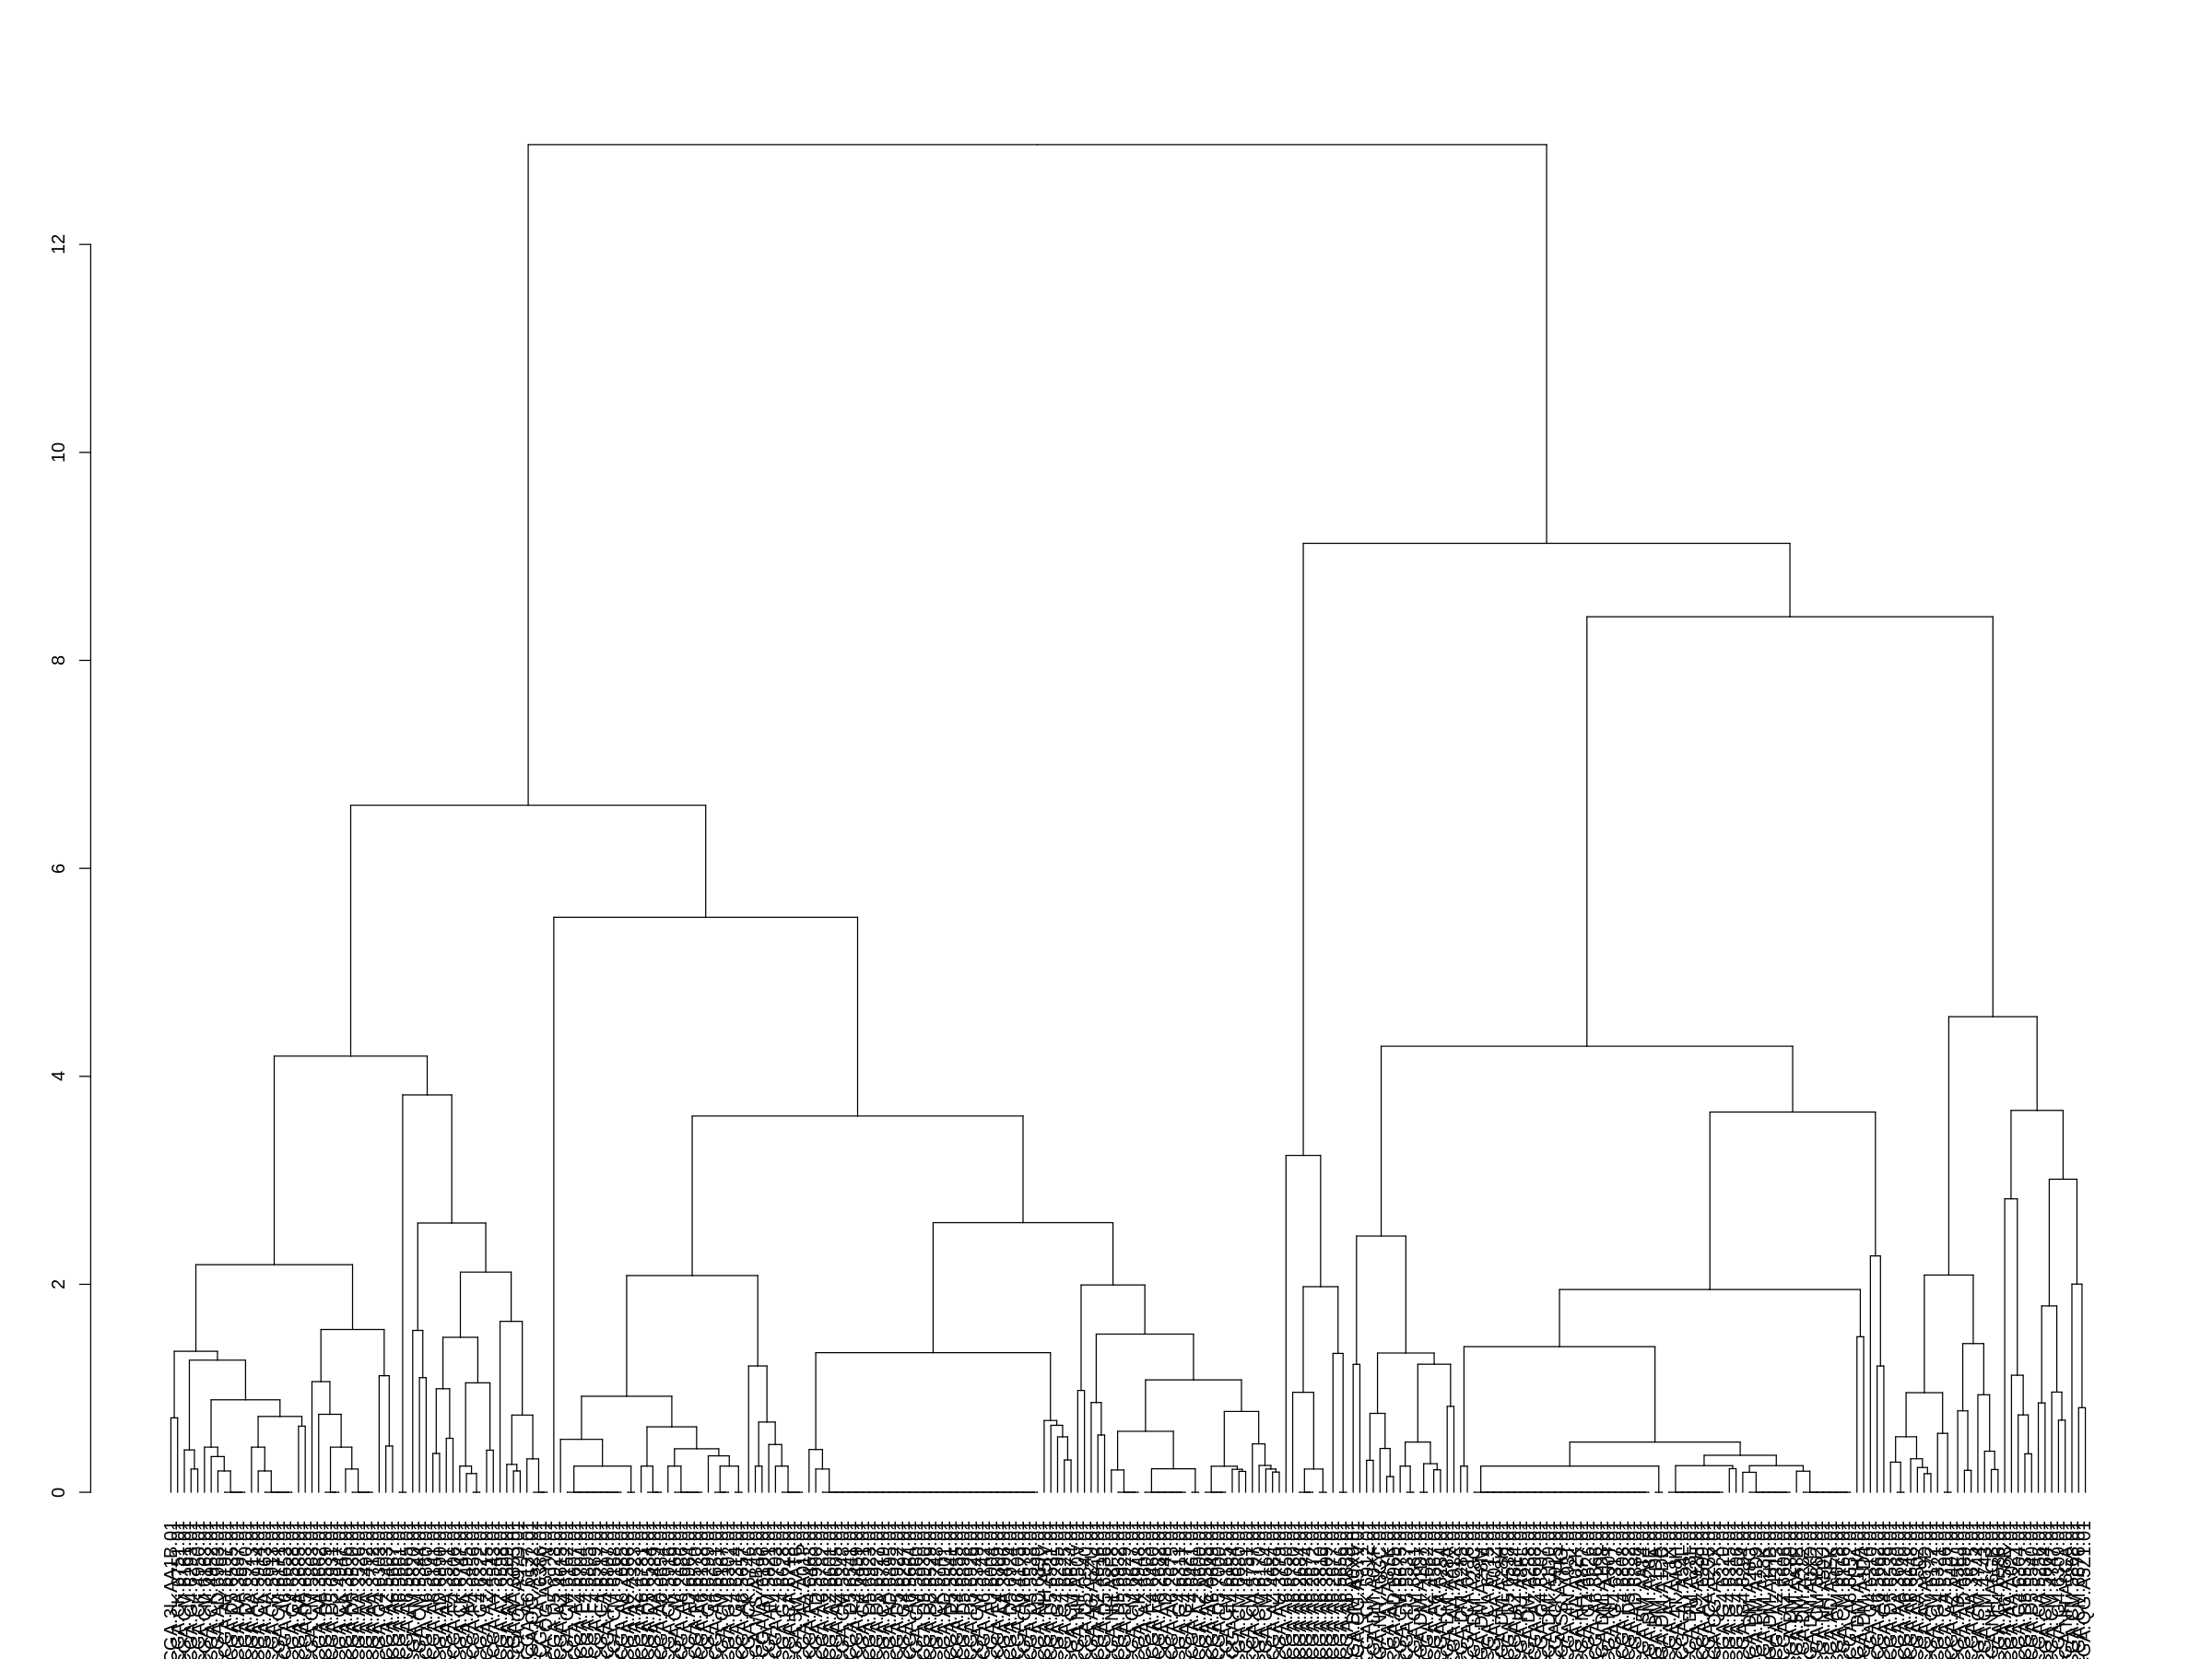

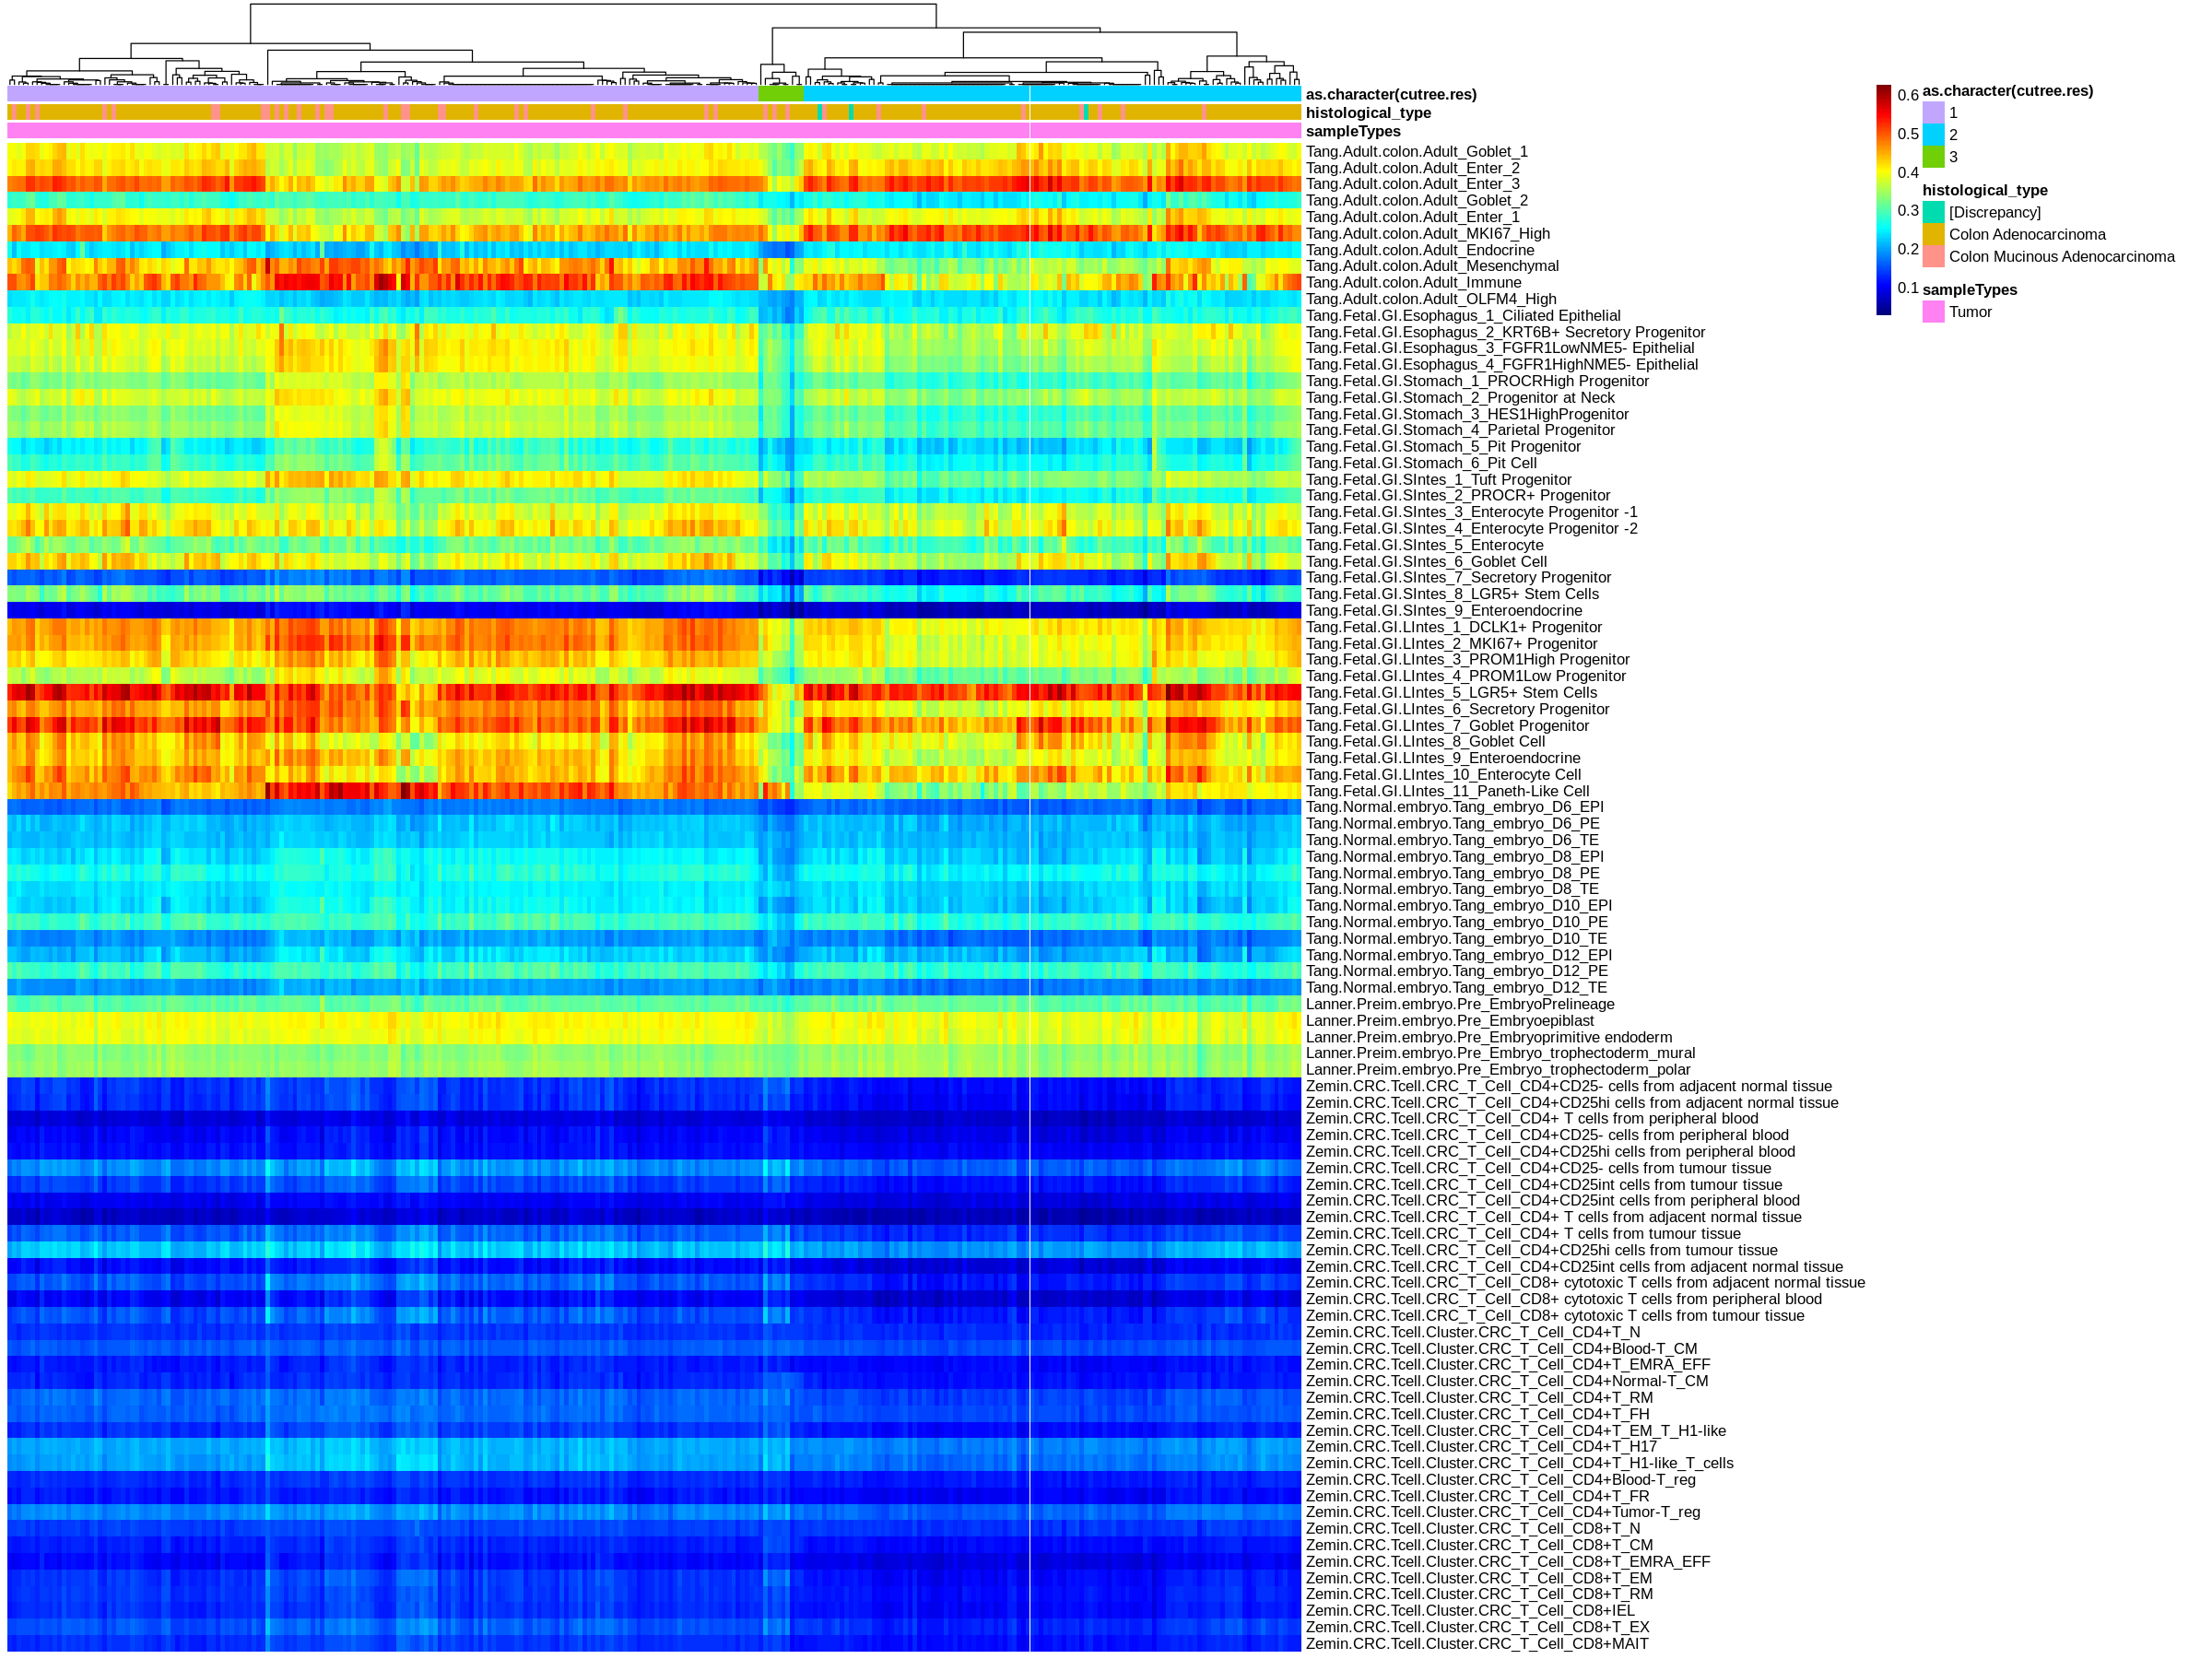

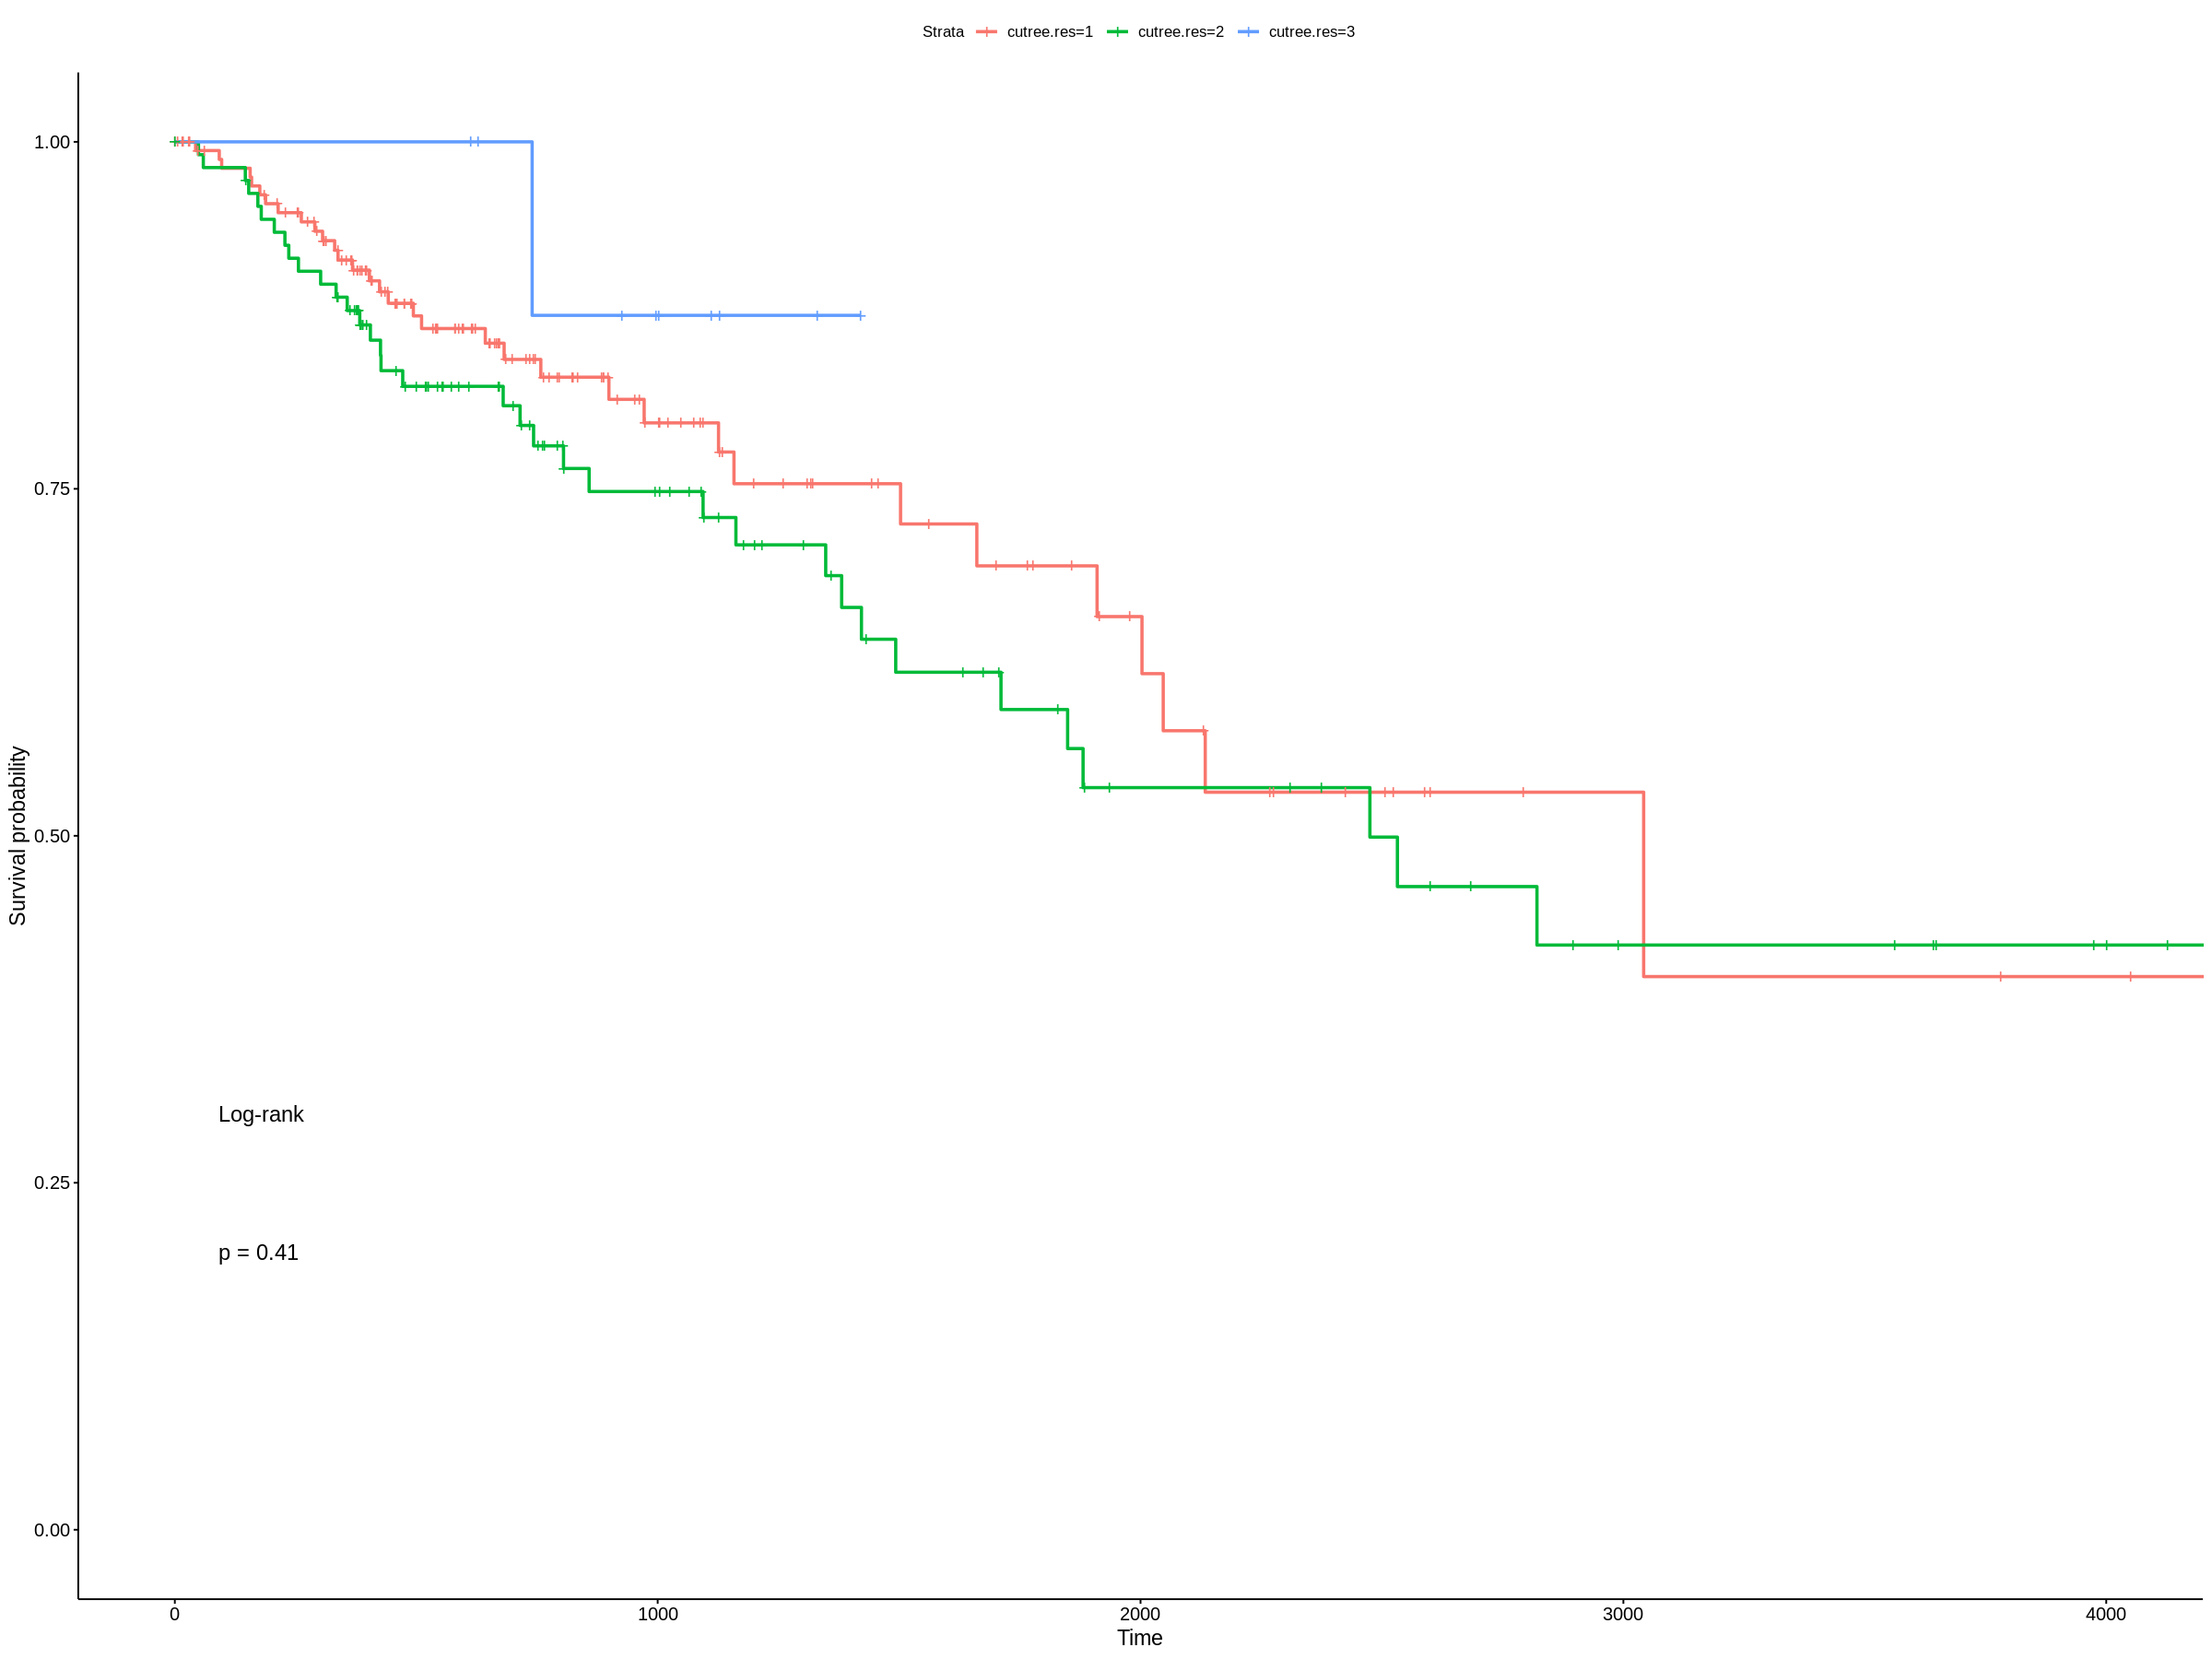

In [5]:
## CV8000
Cor.tumor <- Cor.Res.CV8000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor.8000 <- SC3.Tumor$`3`$hc
Col.anno <- COAD.pheno[TumorID,c("sampleTypes","histological_type","OS","OS.time")]
options(repr.plot.width=20, repr.plot.height=15)
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Cor.tumor, hclust.res = hcTumor.8000, Col.anno = Col.anno, k = 3)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


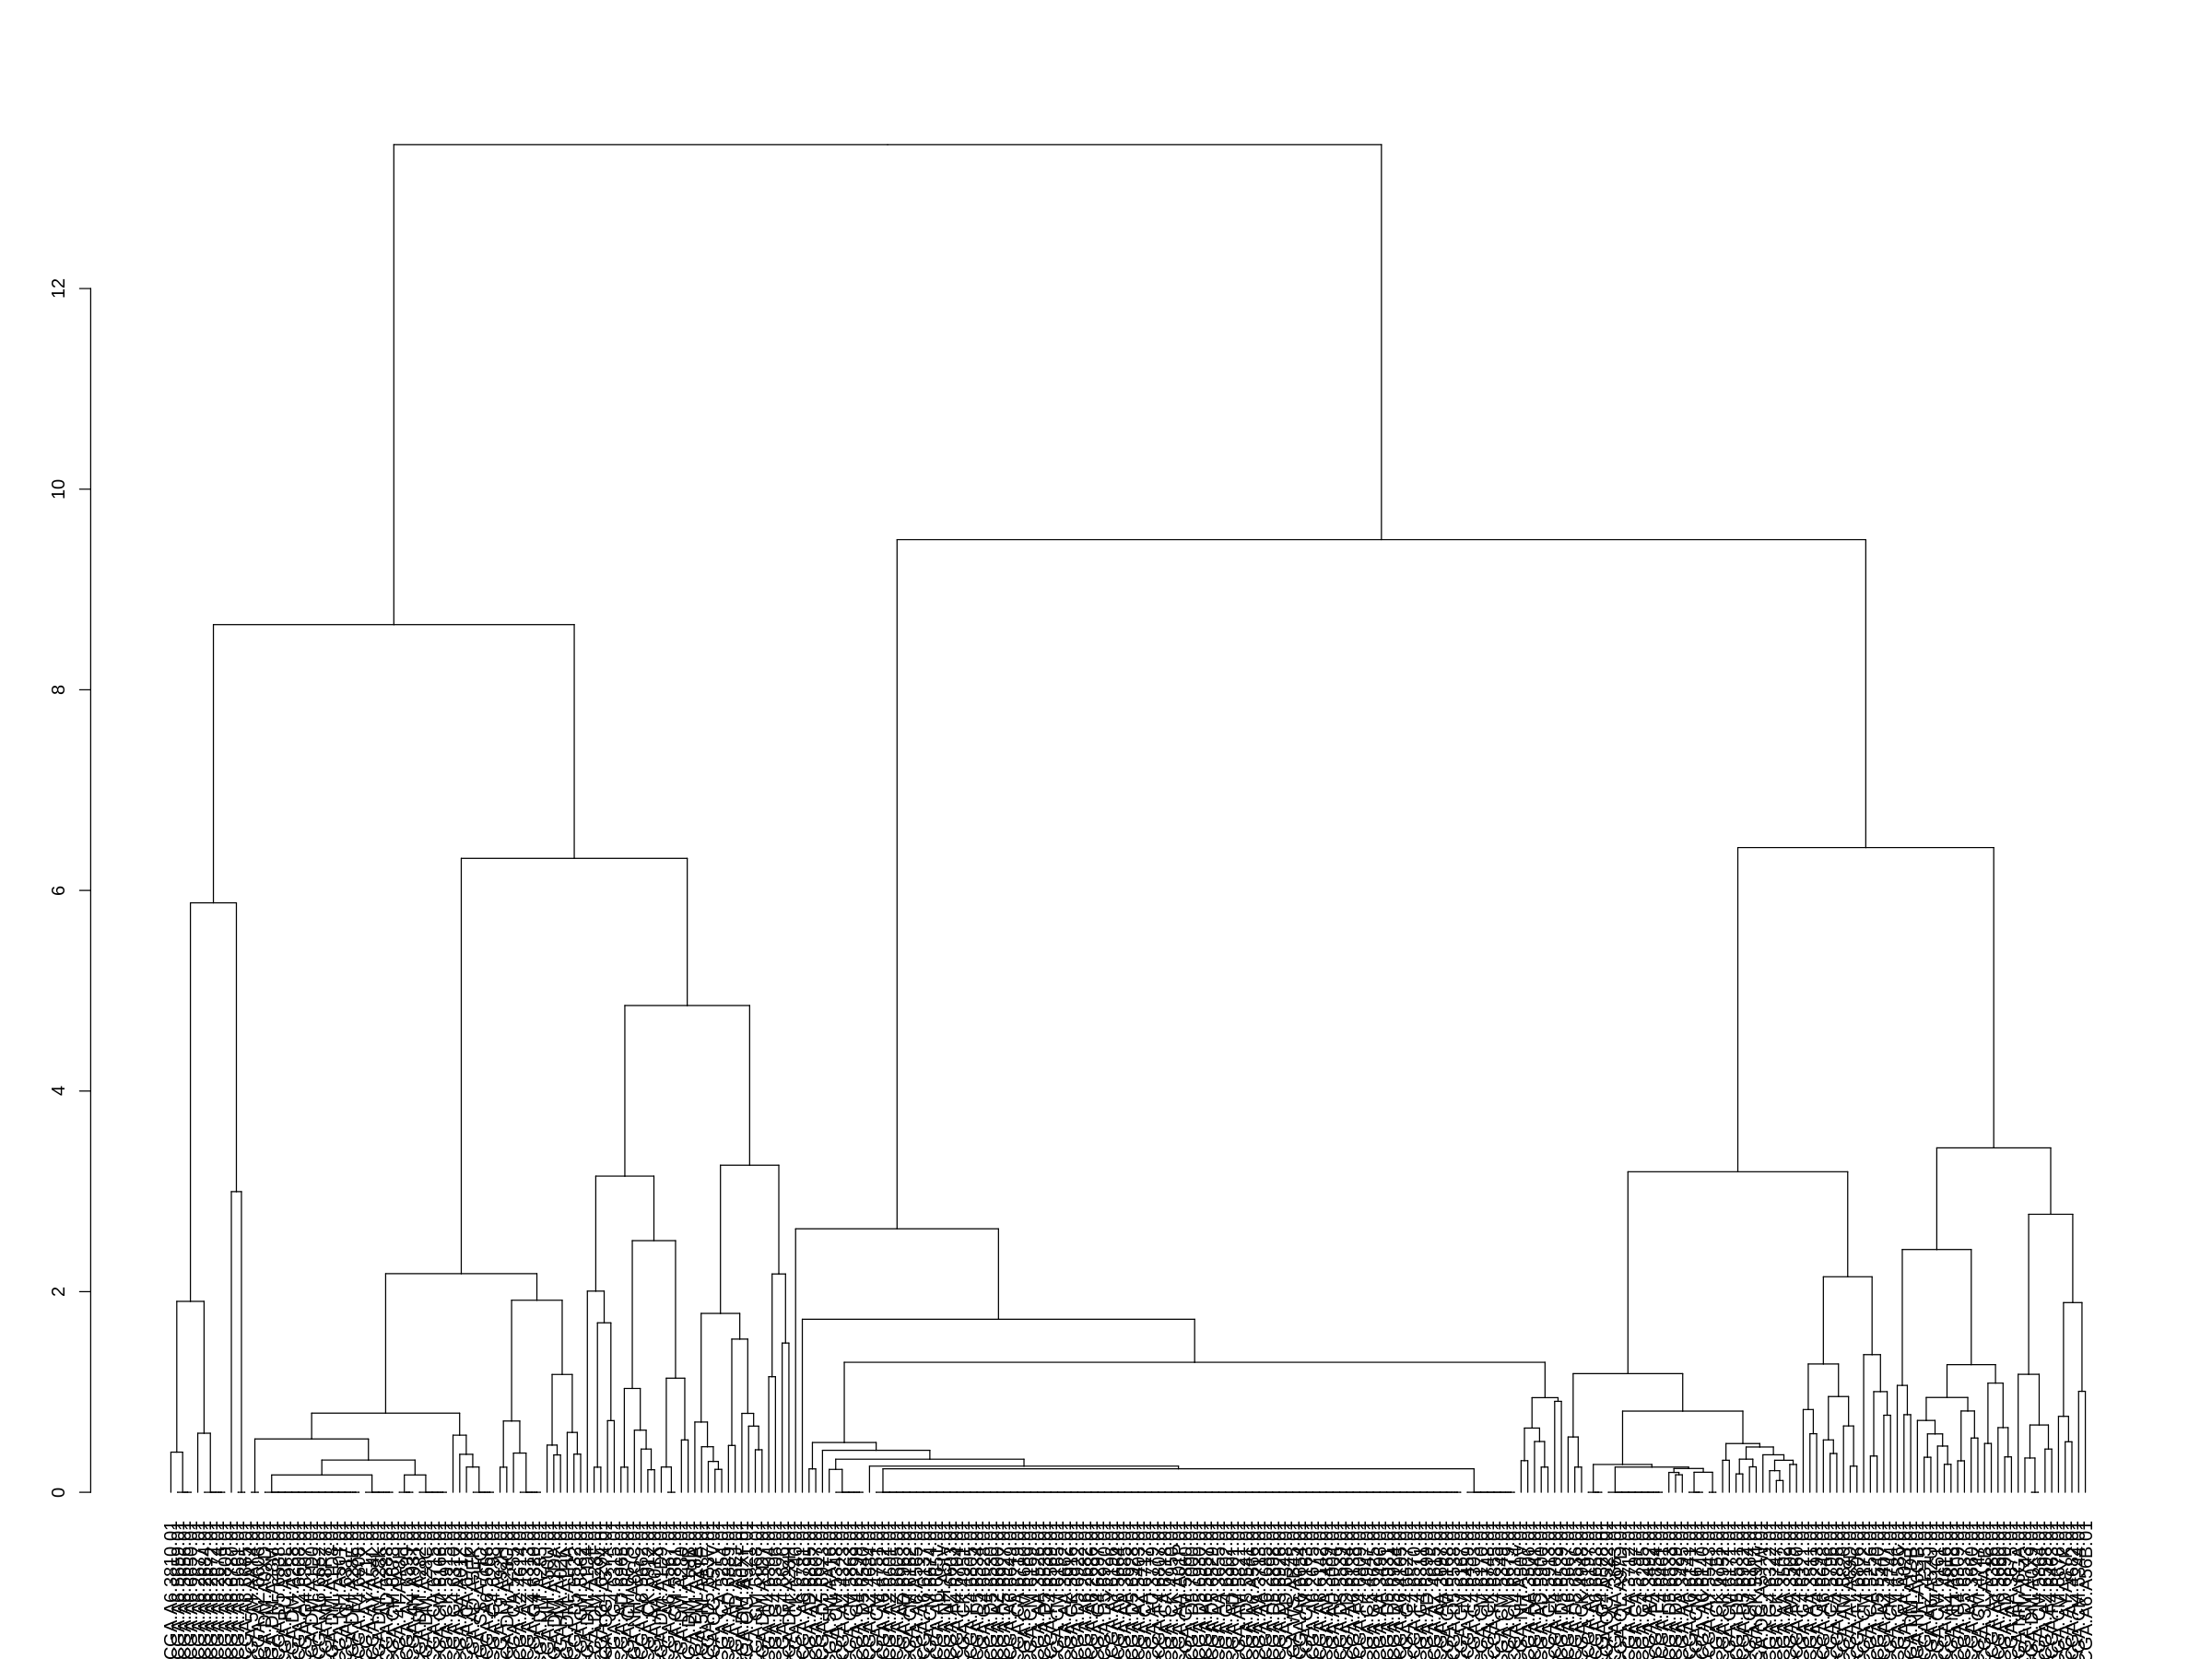

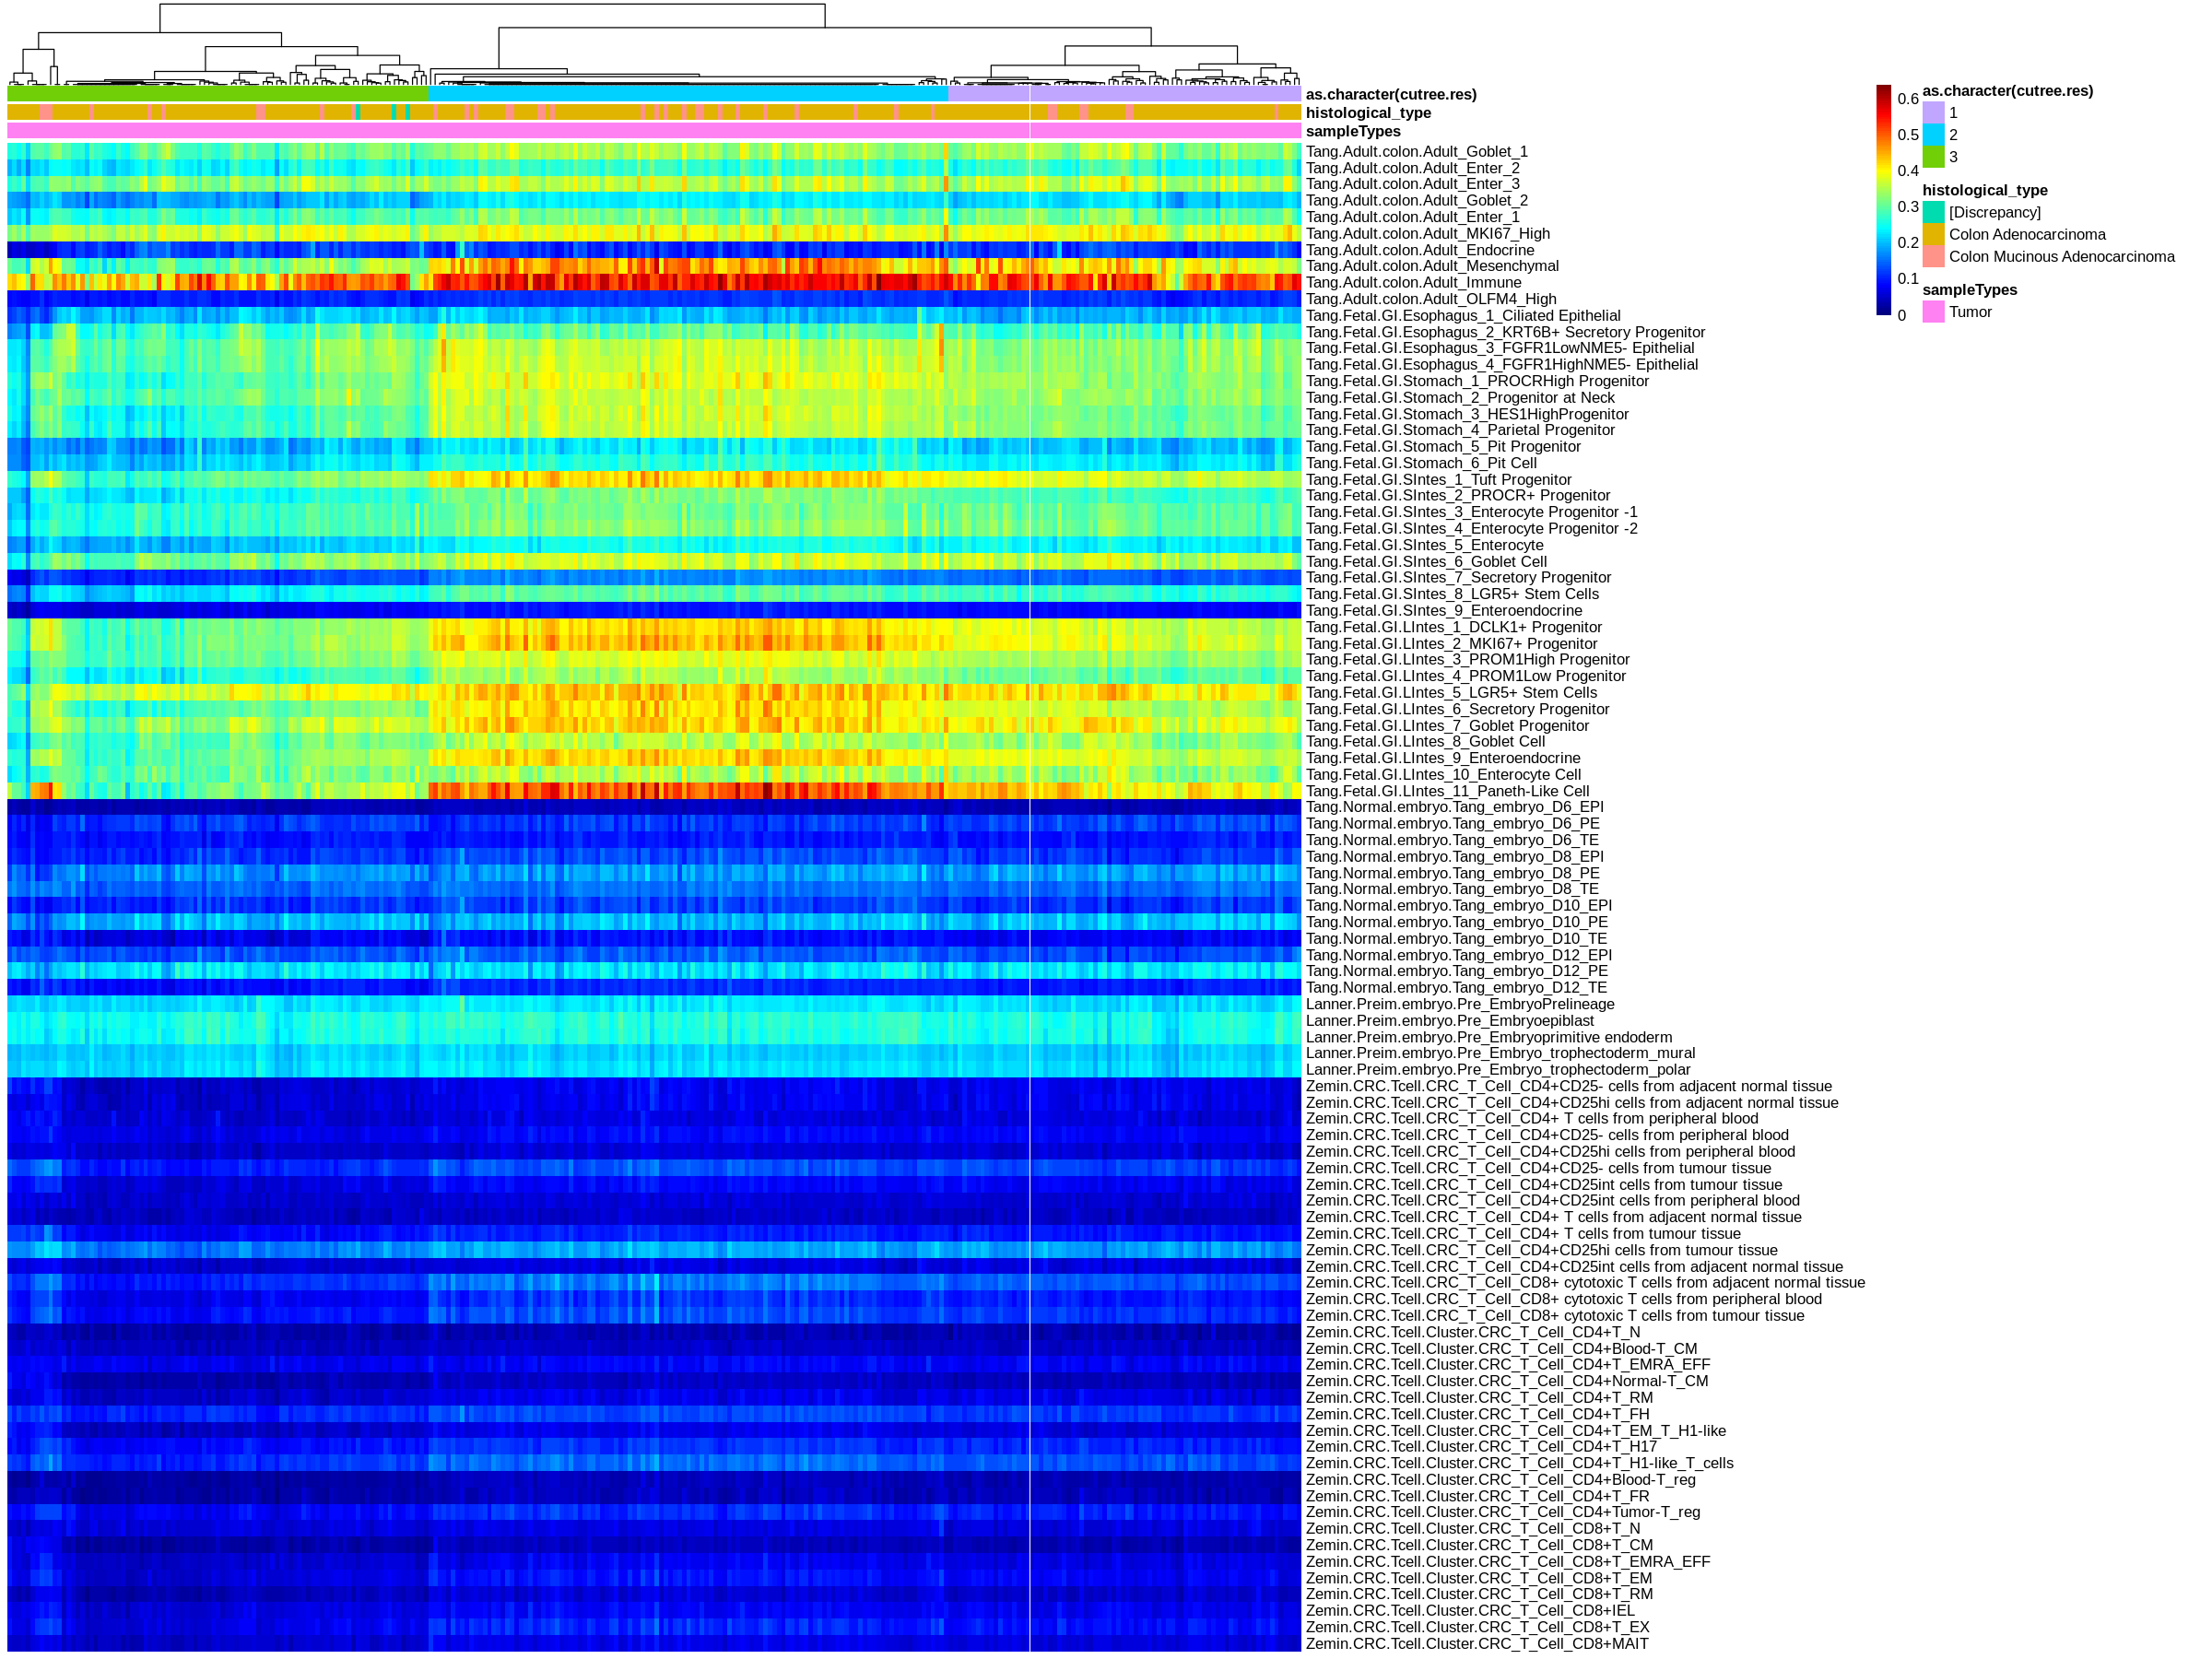

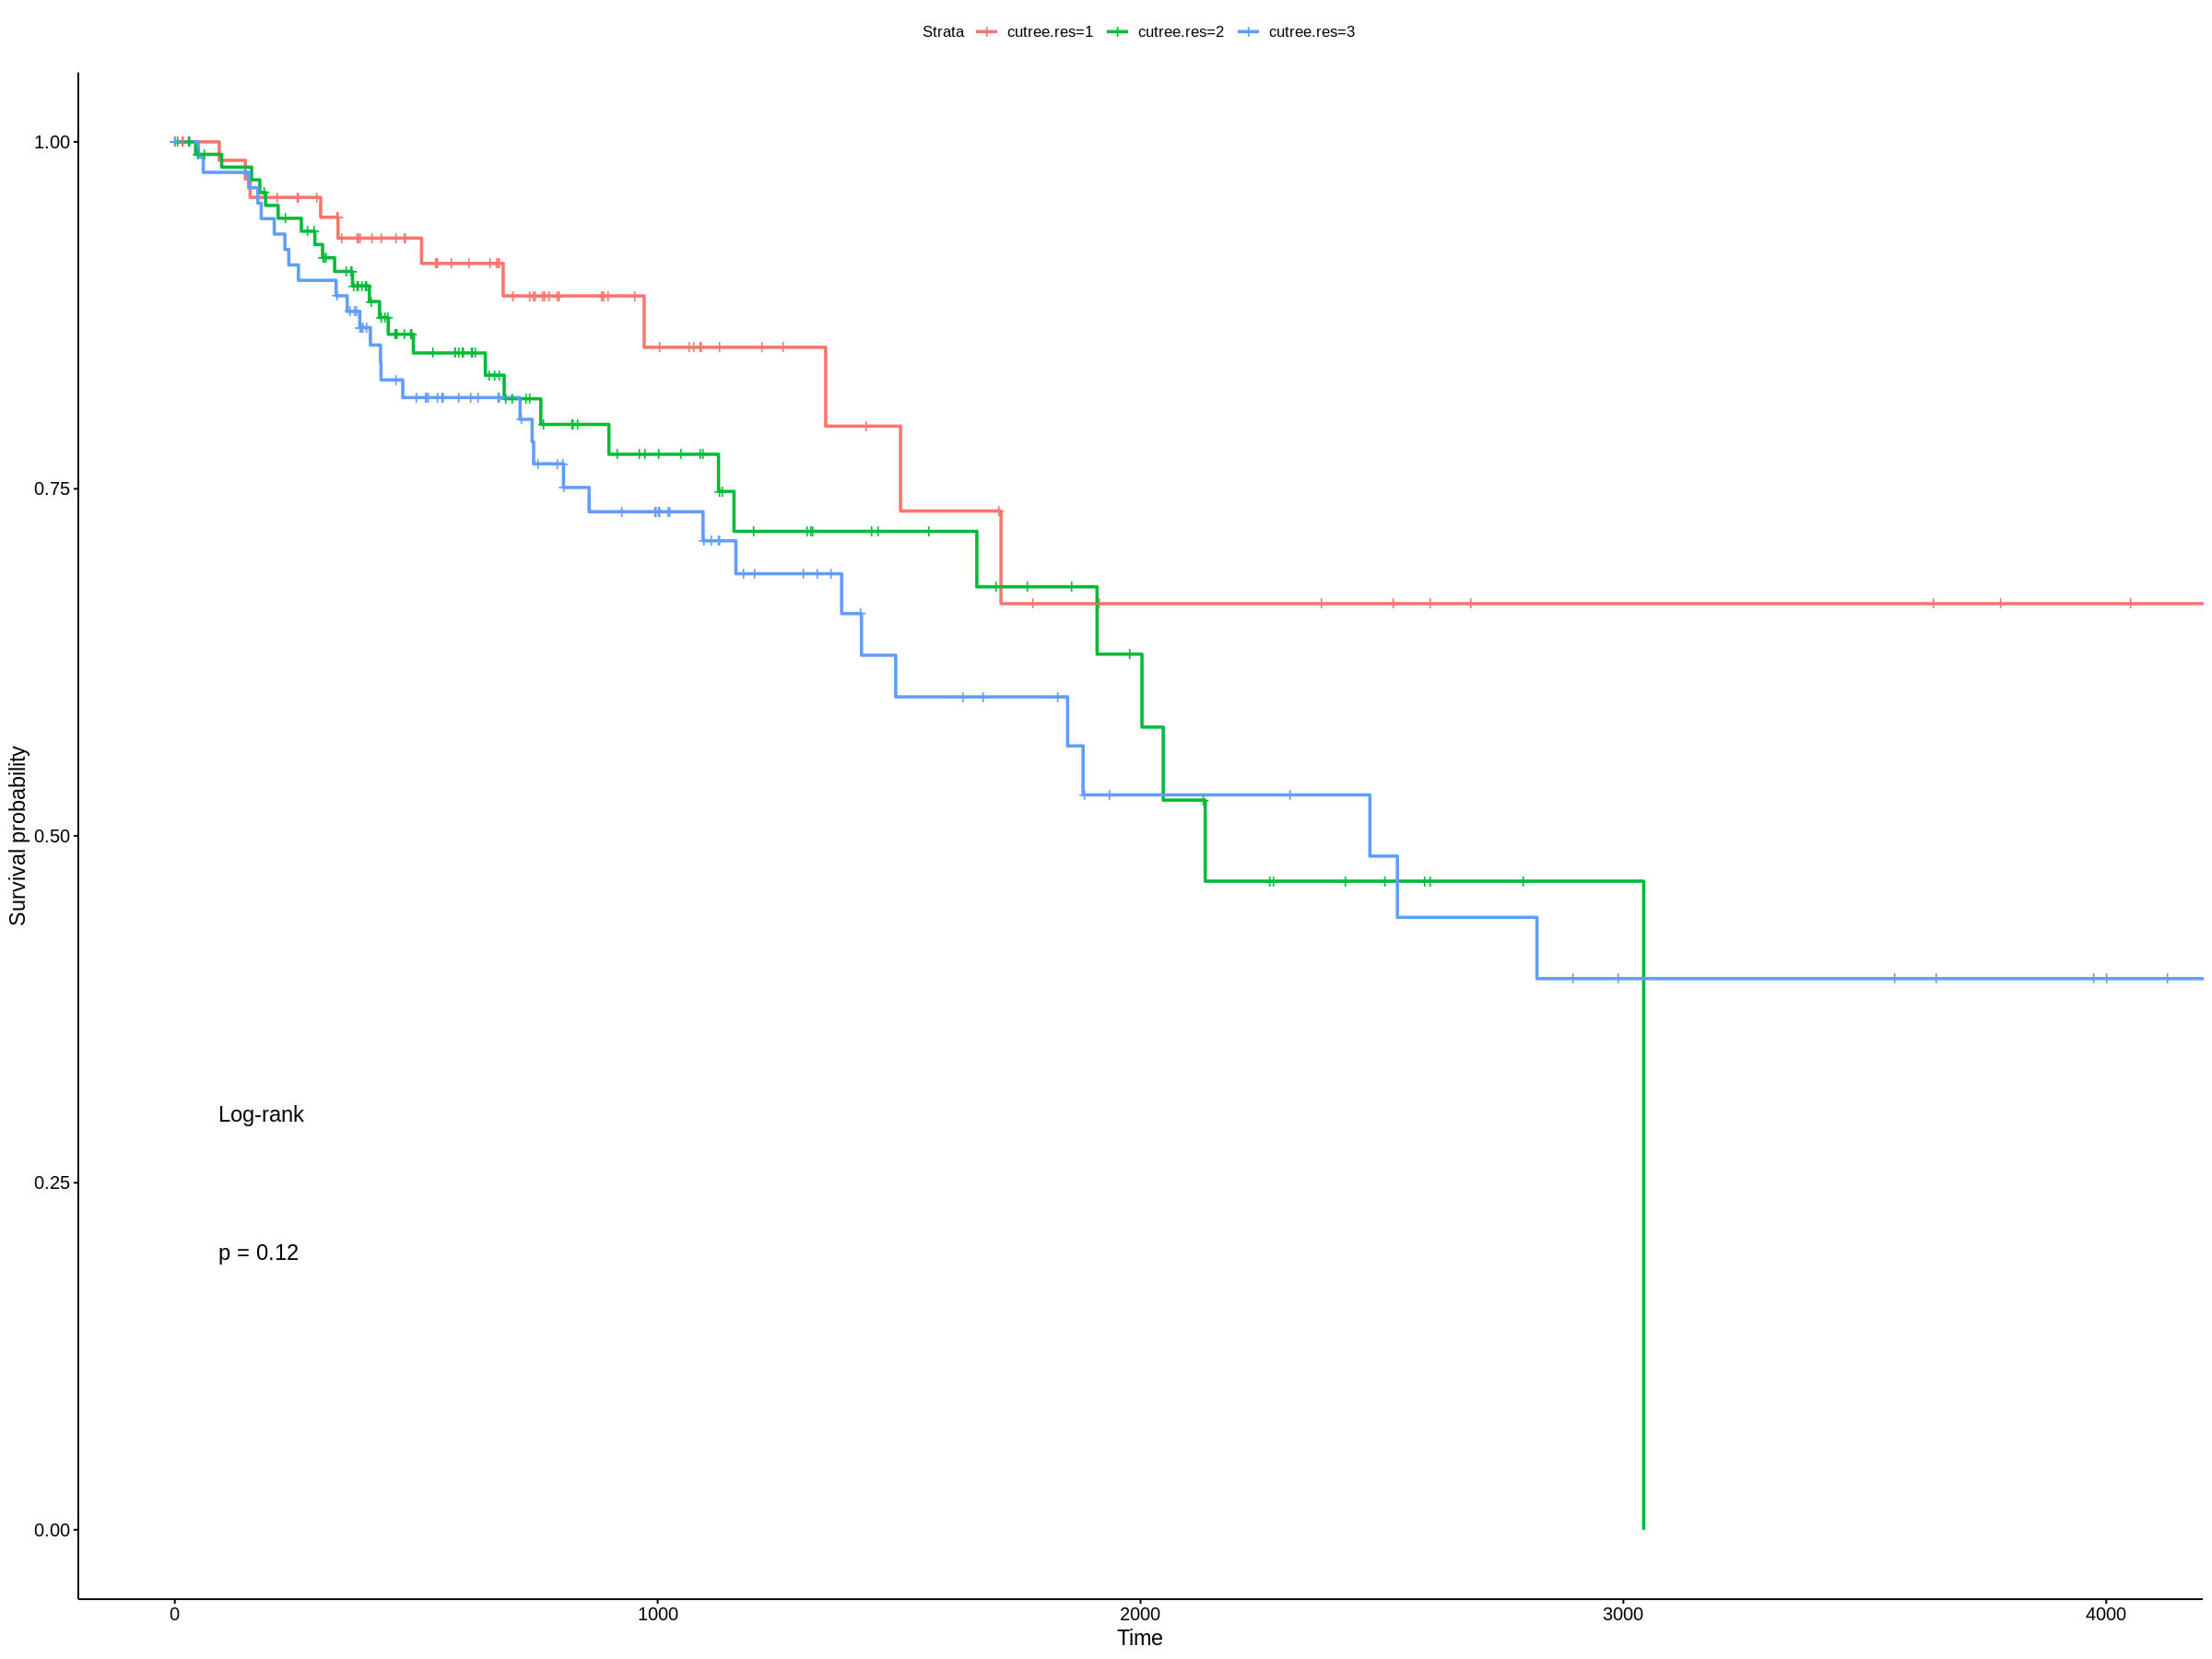

In [6]:
## CV4000
Cor.tumor <- Cor.Res.CV4000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor.4000 <- SC3.Tumor$`3`$hc
Col.anno <- COAD.pheno[TumorID,c("sampleTypes","histological_type","OS","OS.time")]
options(repr.plot.width=20, repr.plot.height=15)
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Cor.tumor, hclust.res = hcTumor.4000, Col.anno = Col.anno, k = 3)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


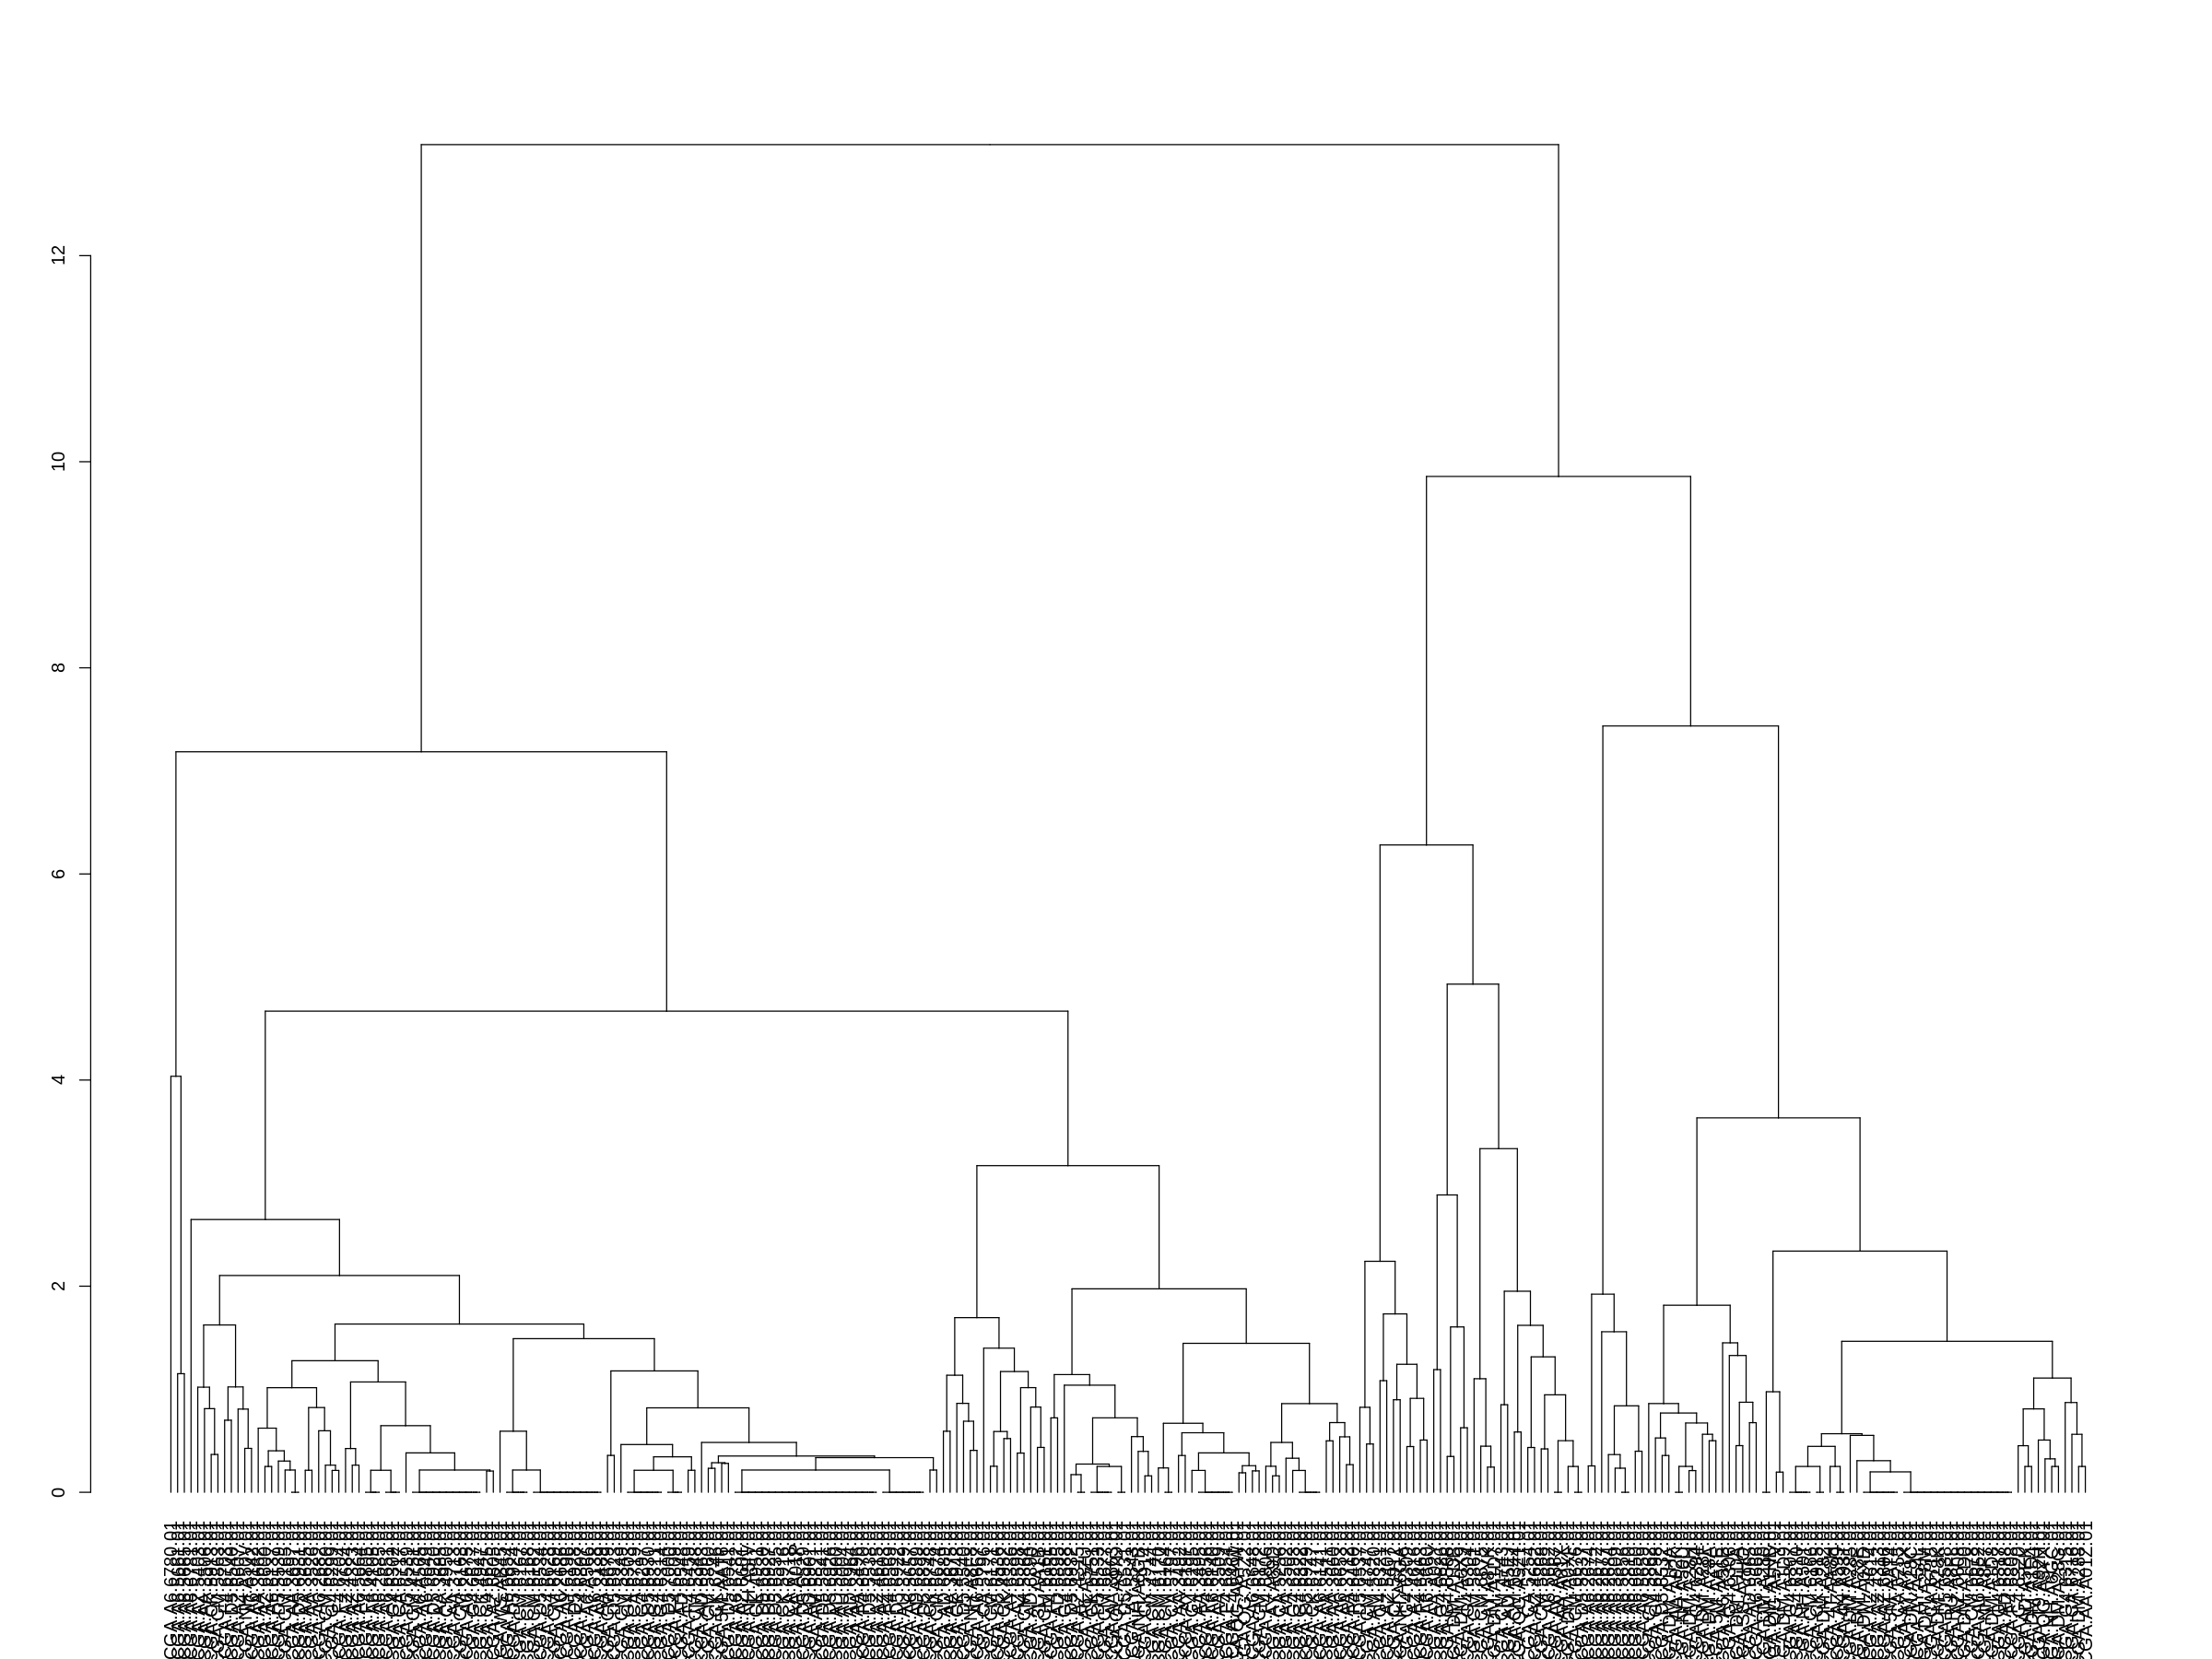

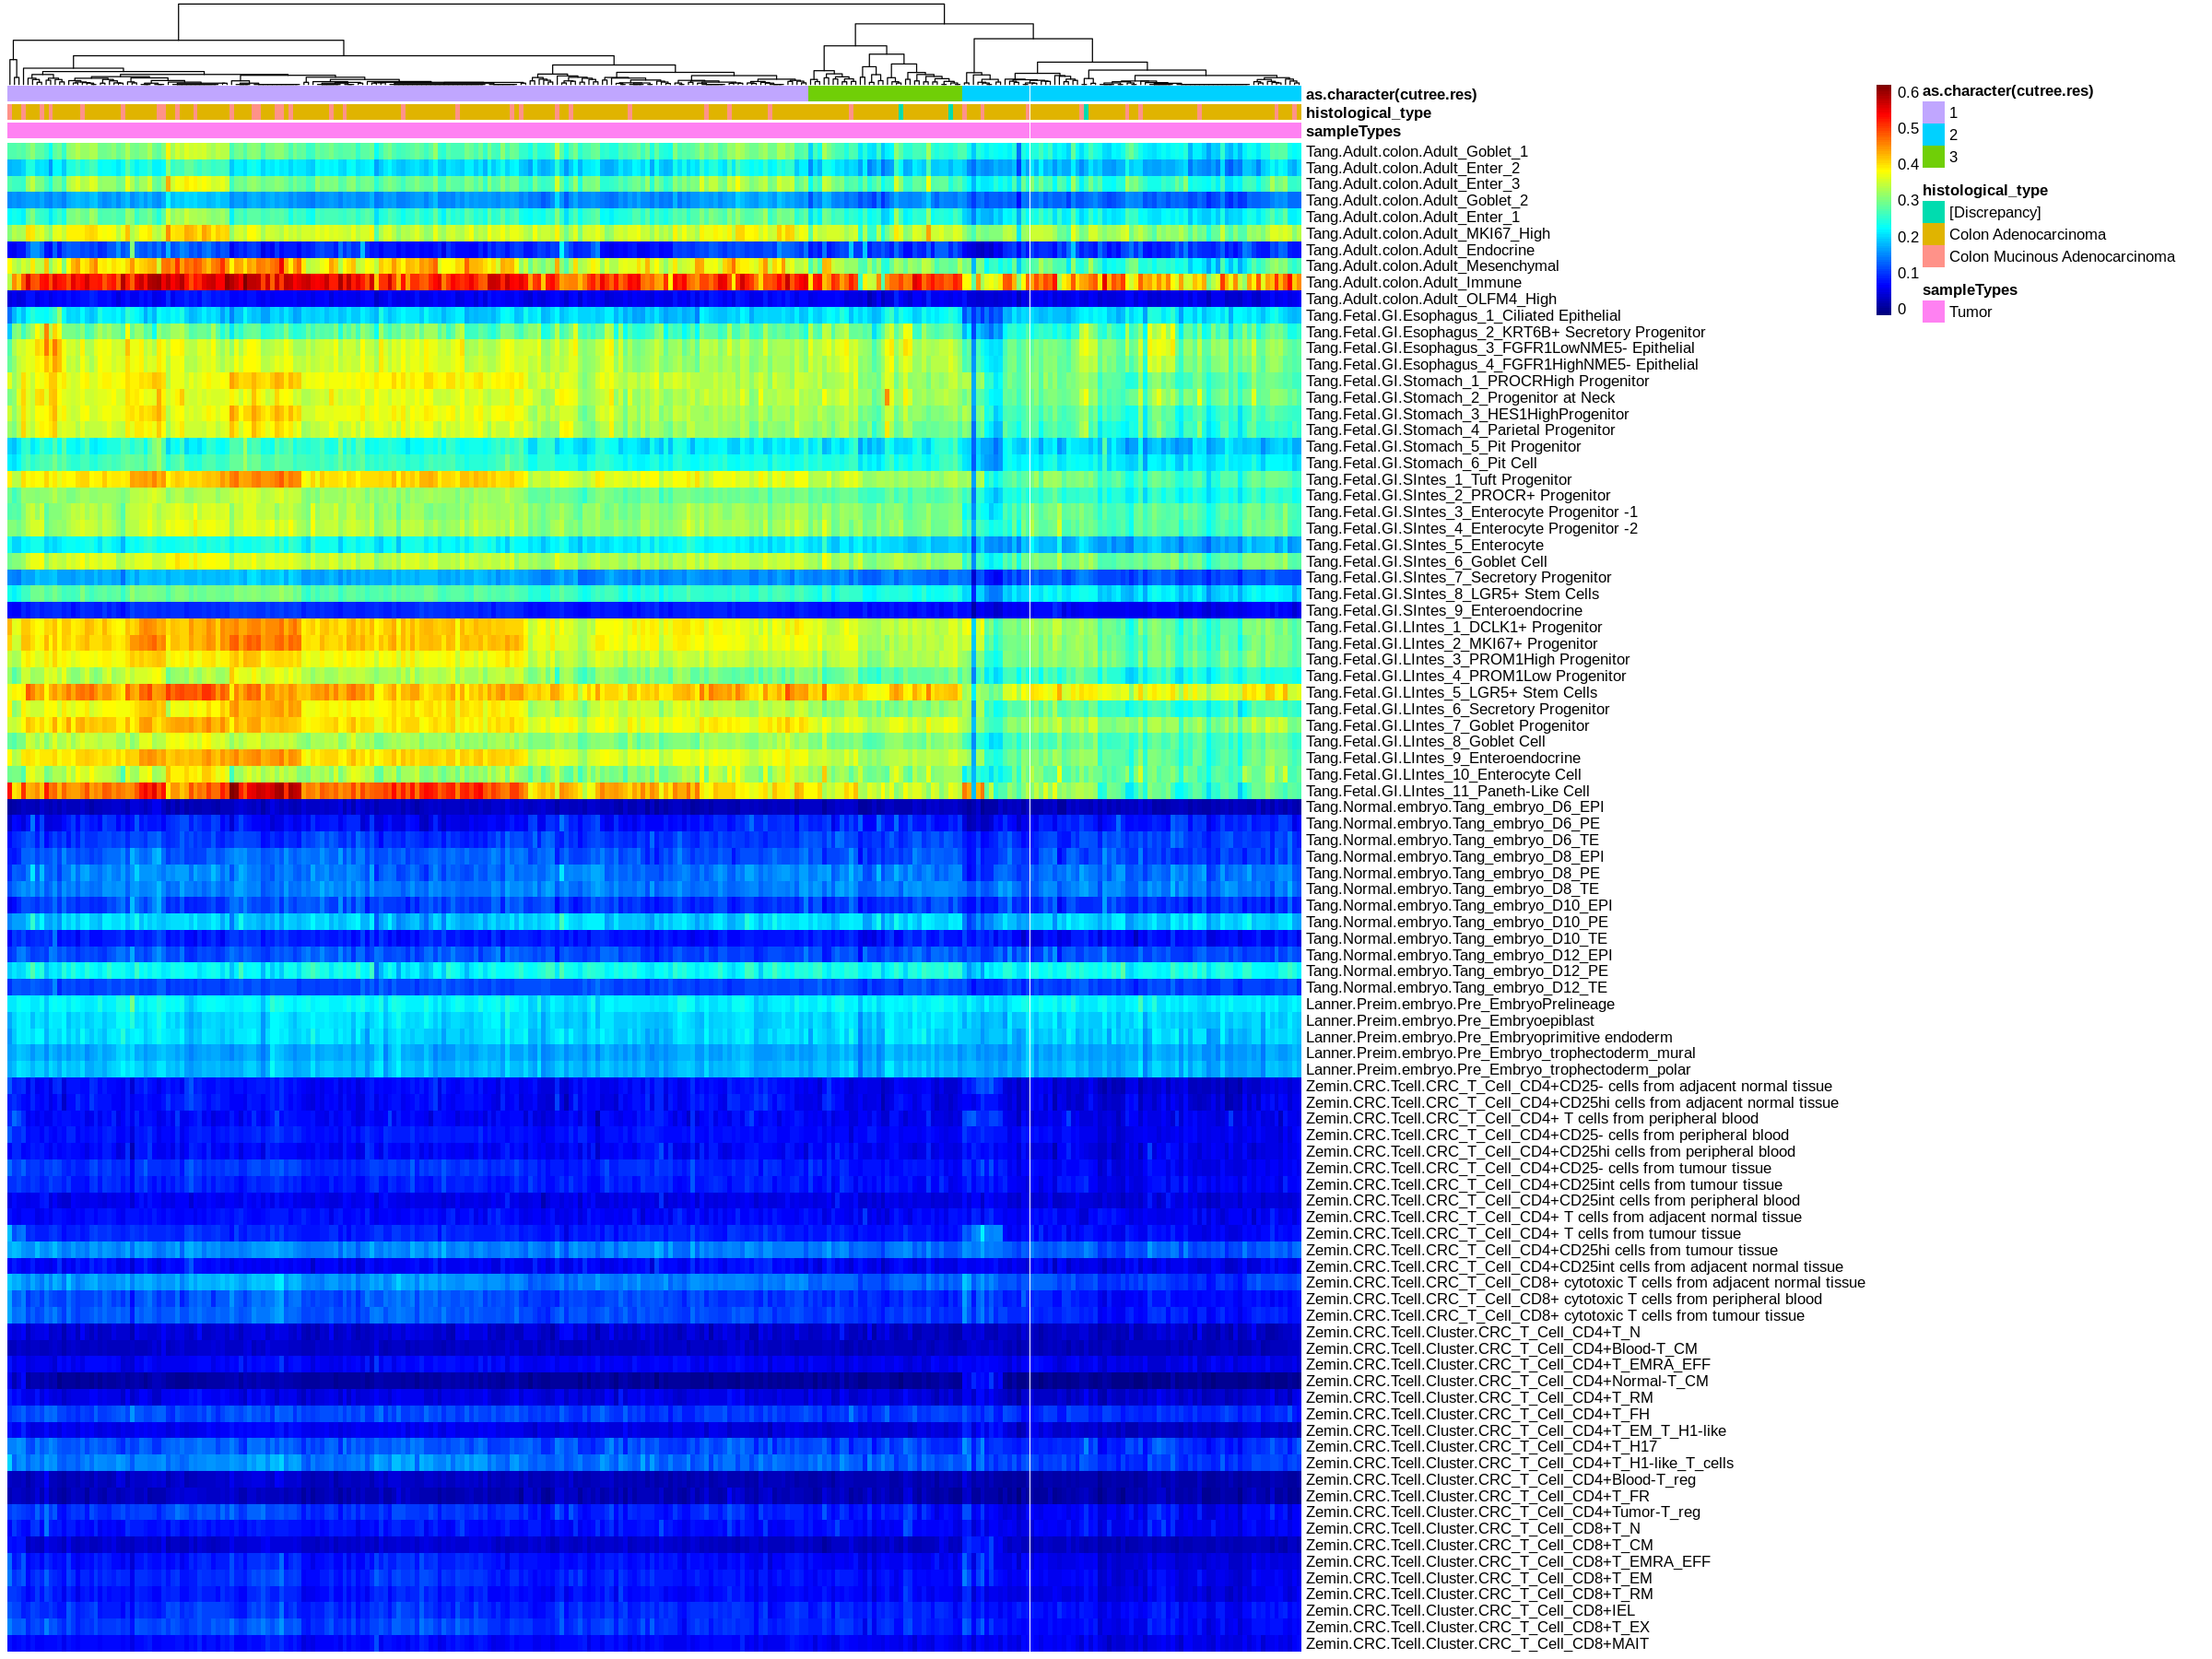

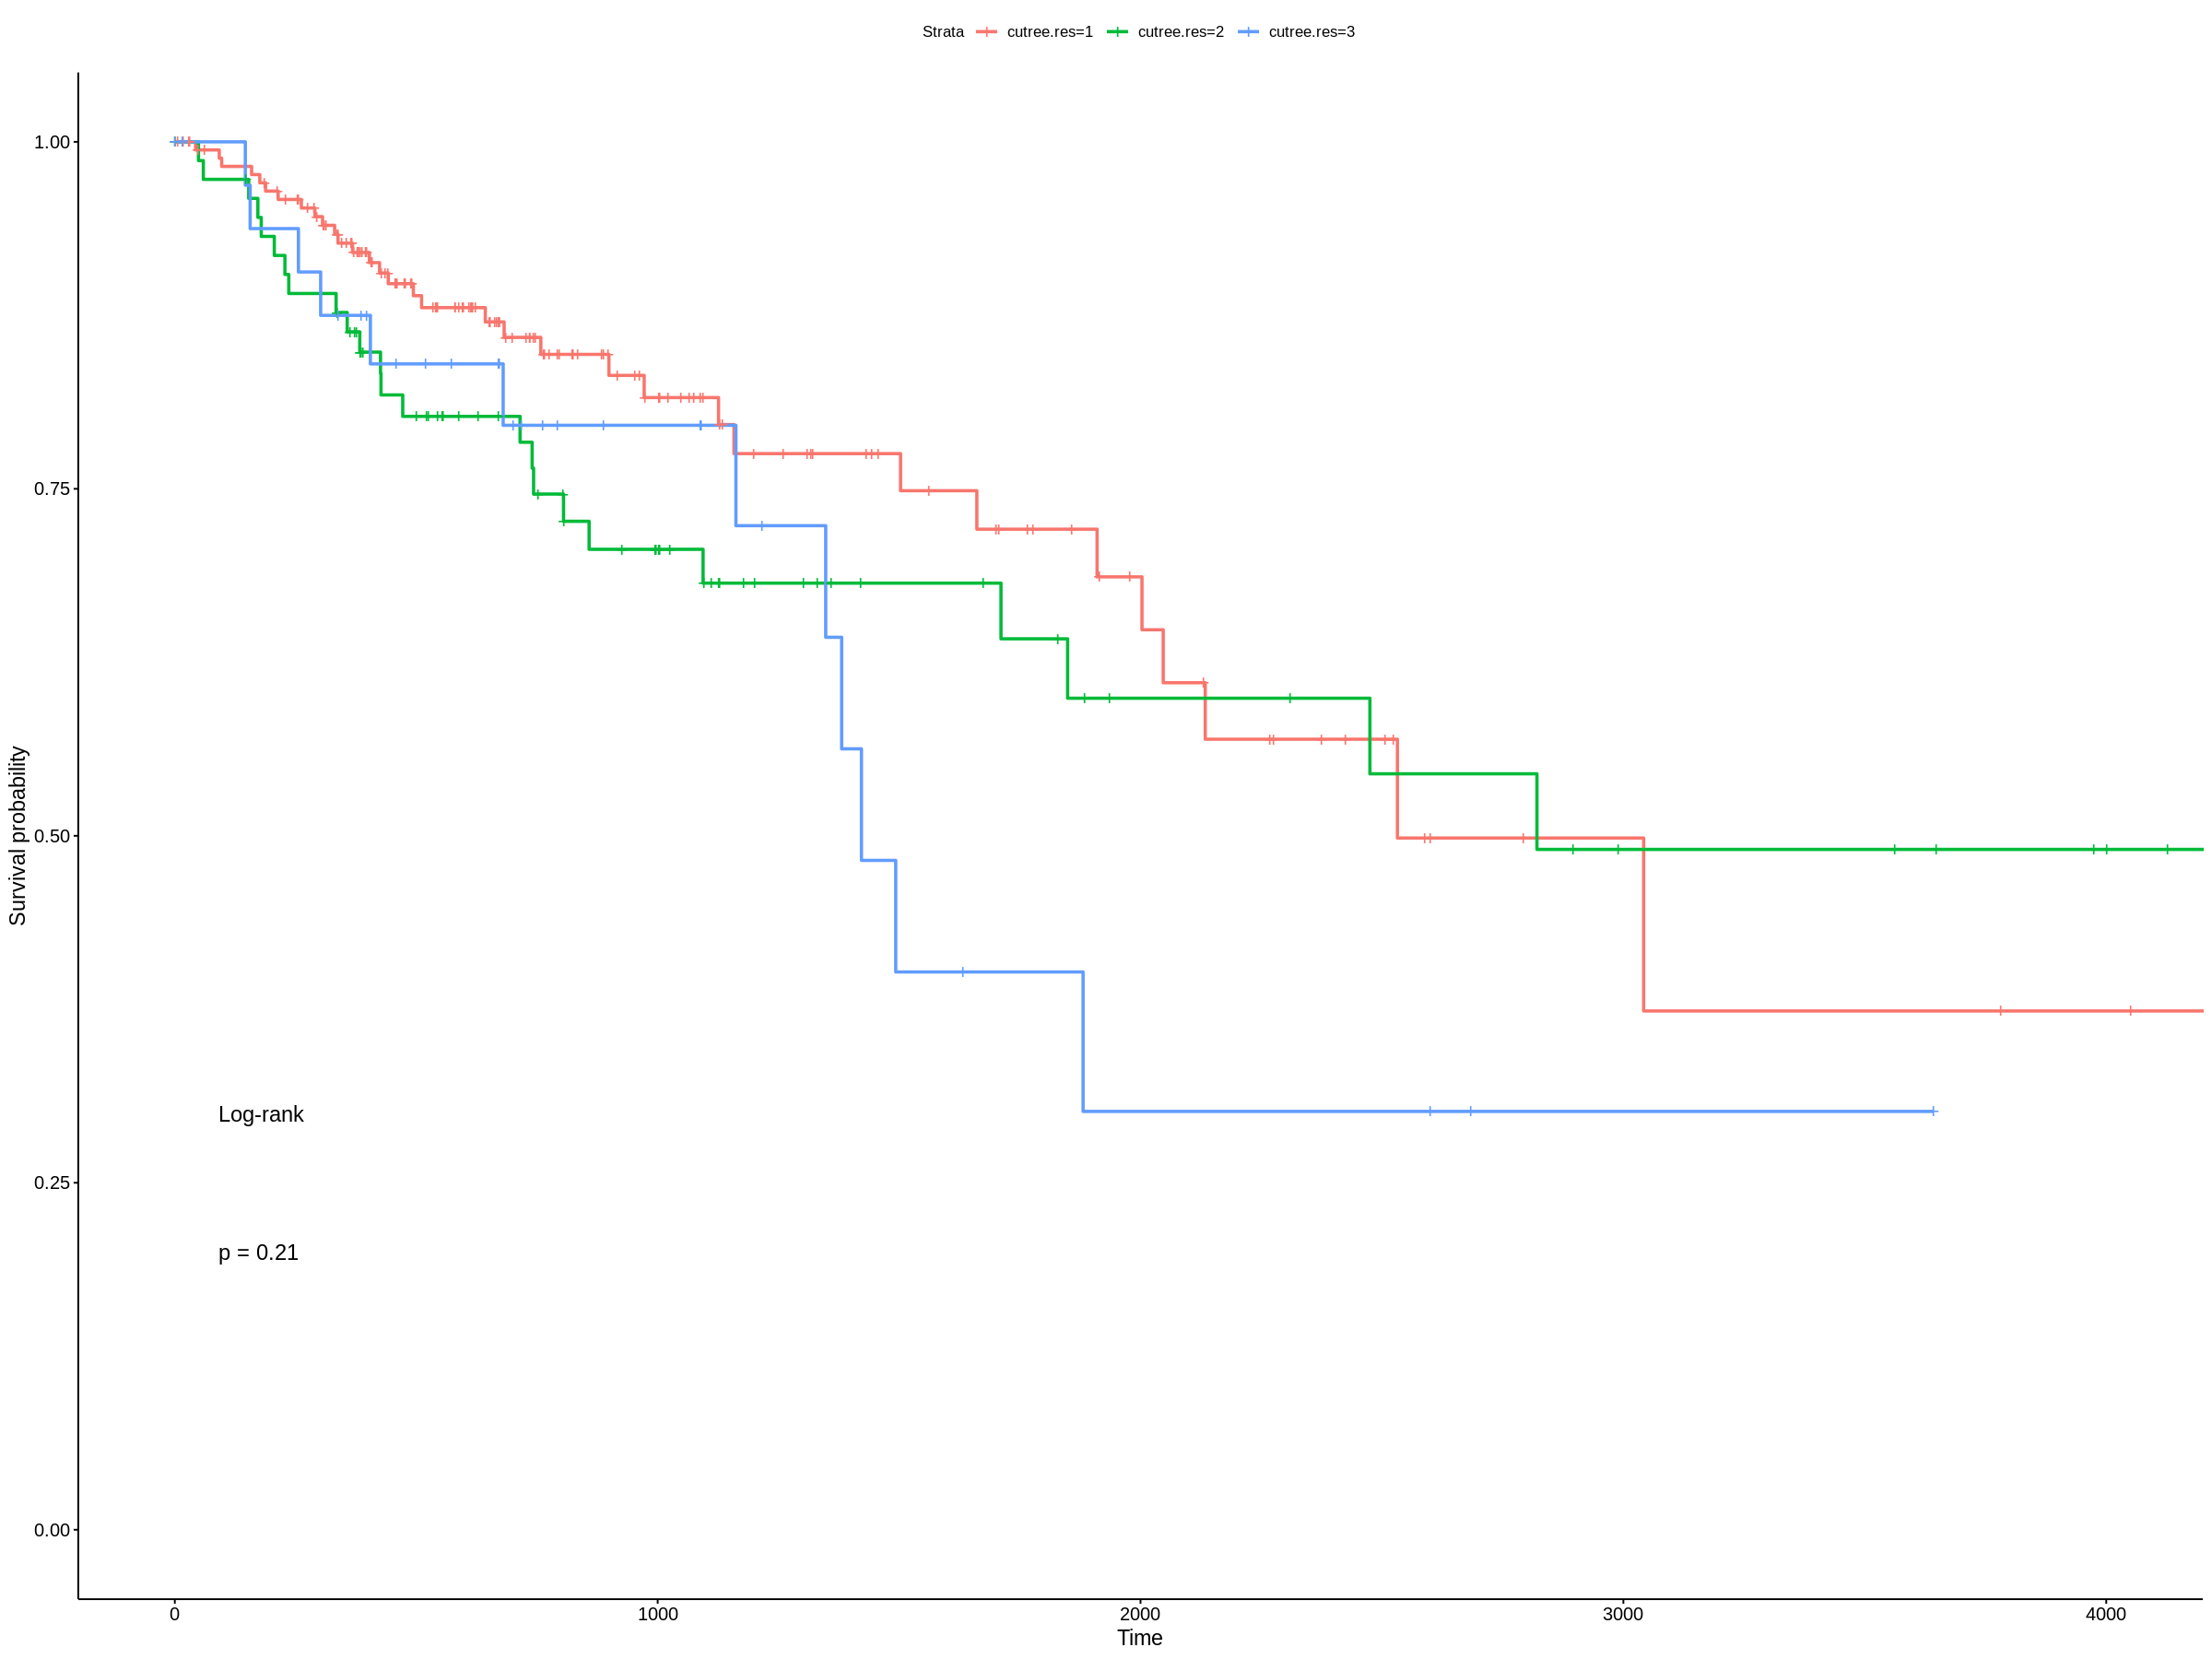

In [7]:
## CV3000
Cor.tumor <- Cor.Res.CV3000$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor.3000 <- SC3.Tumor$`3`$hc
Col.anno <- COAD.pheno[TumorID,c("sampleTypes","histological_type","OS","OS.time")]
options(repr.plot.width=20, repr.plot.height=15)
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Cor.tumor, hclust.res = hcTumor.3000, Col.anno = Col.anno, k = 3)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


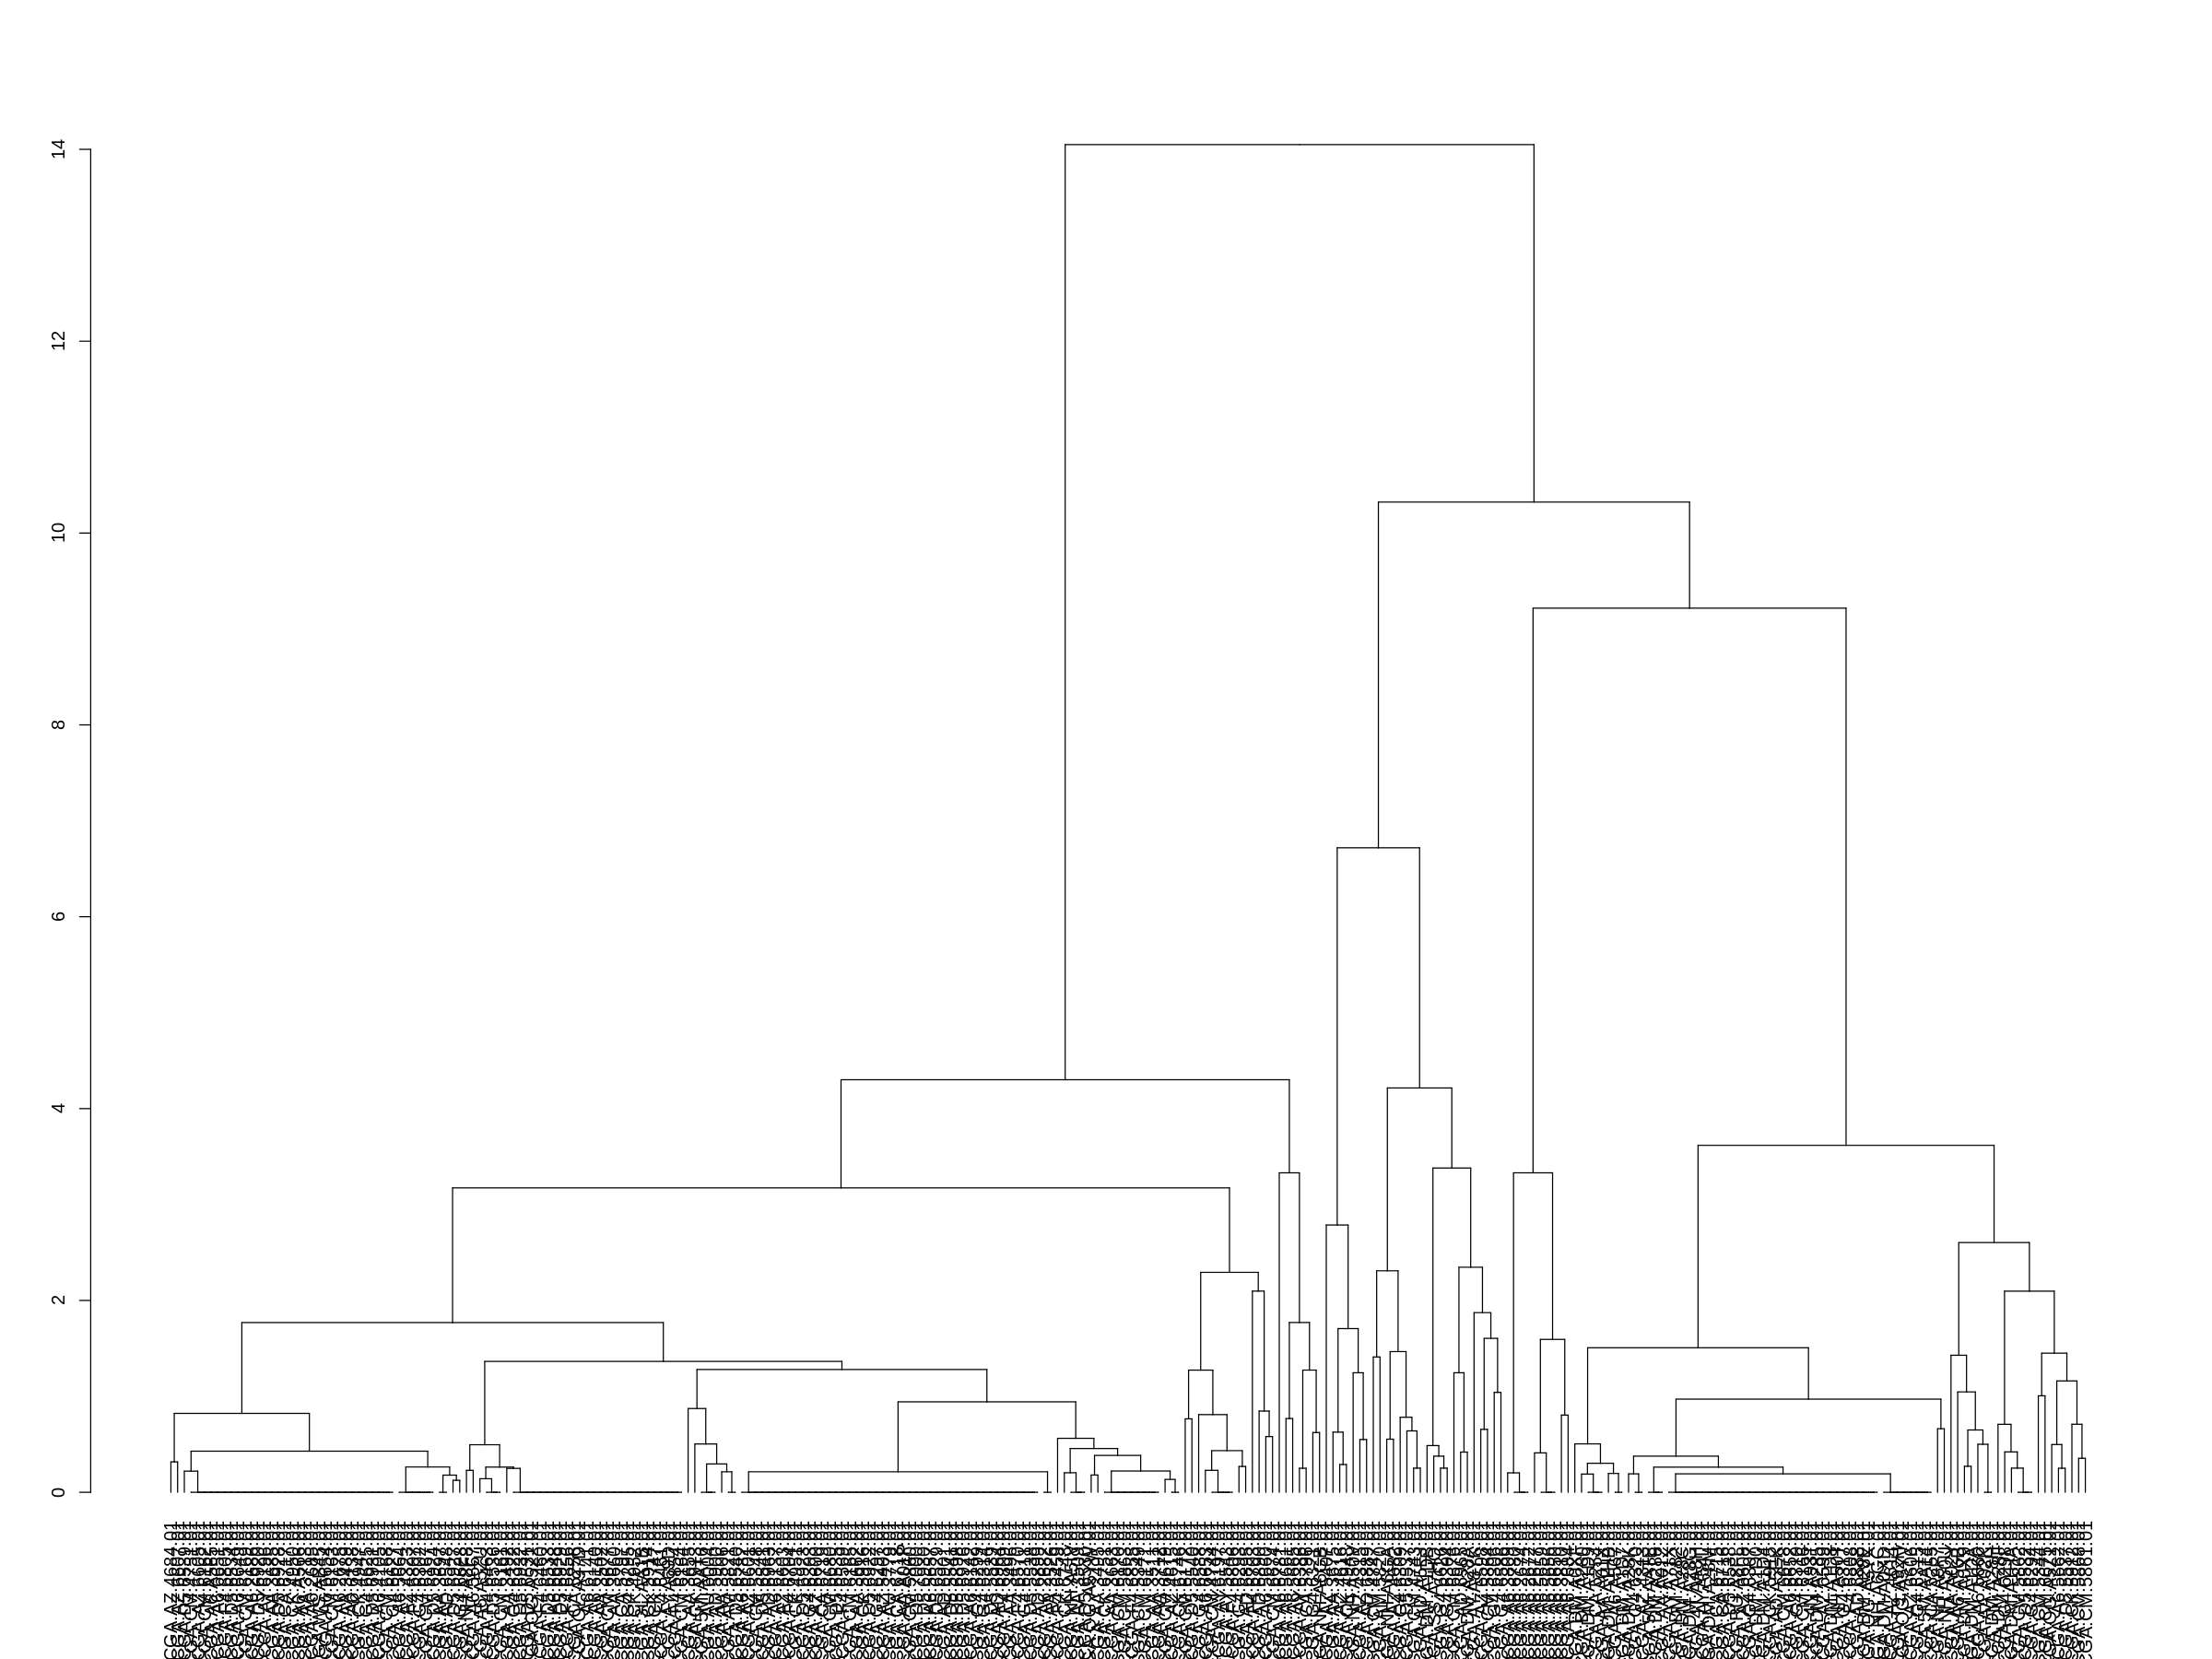

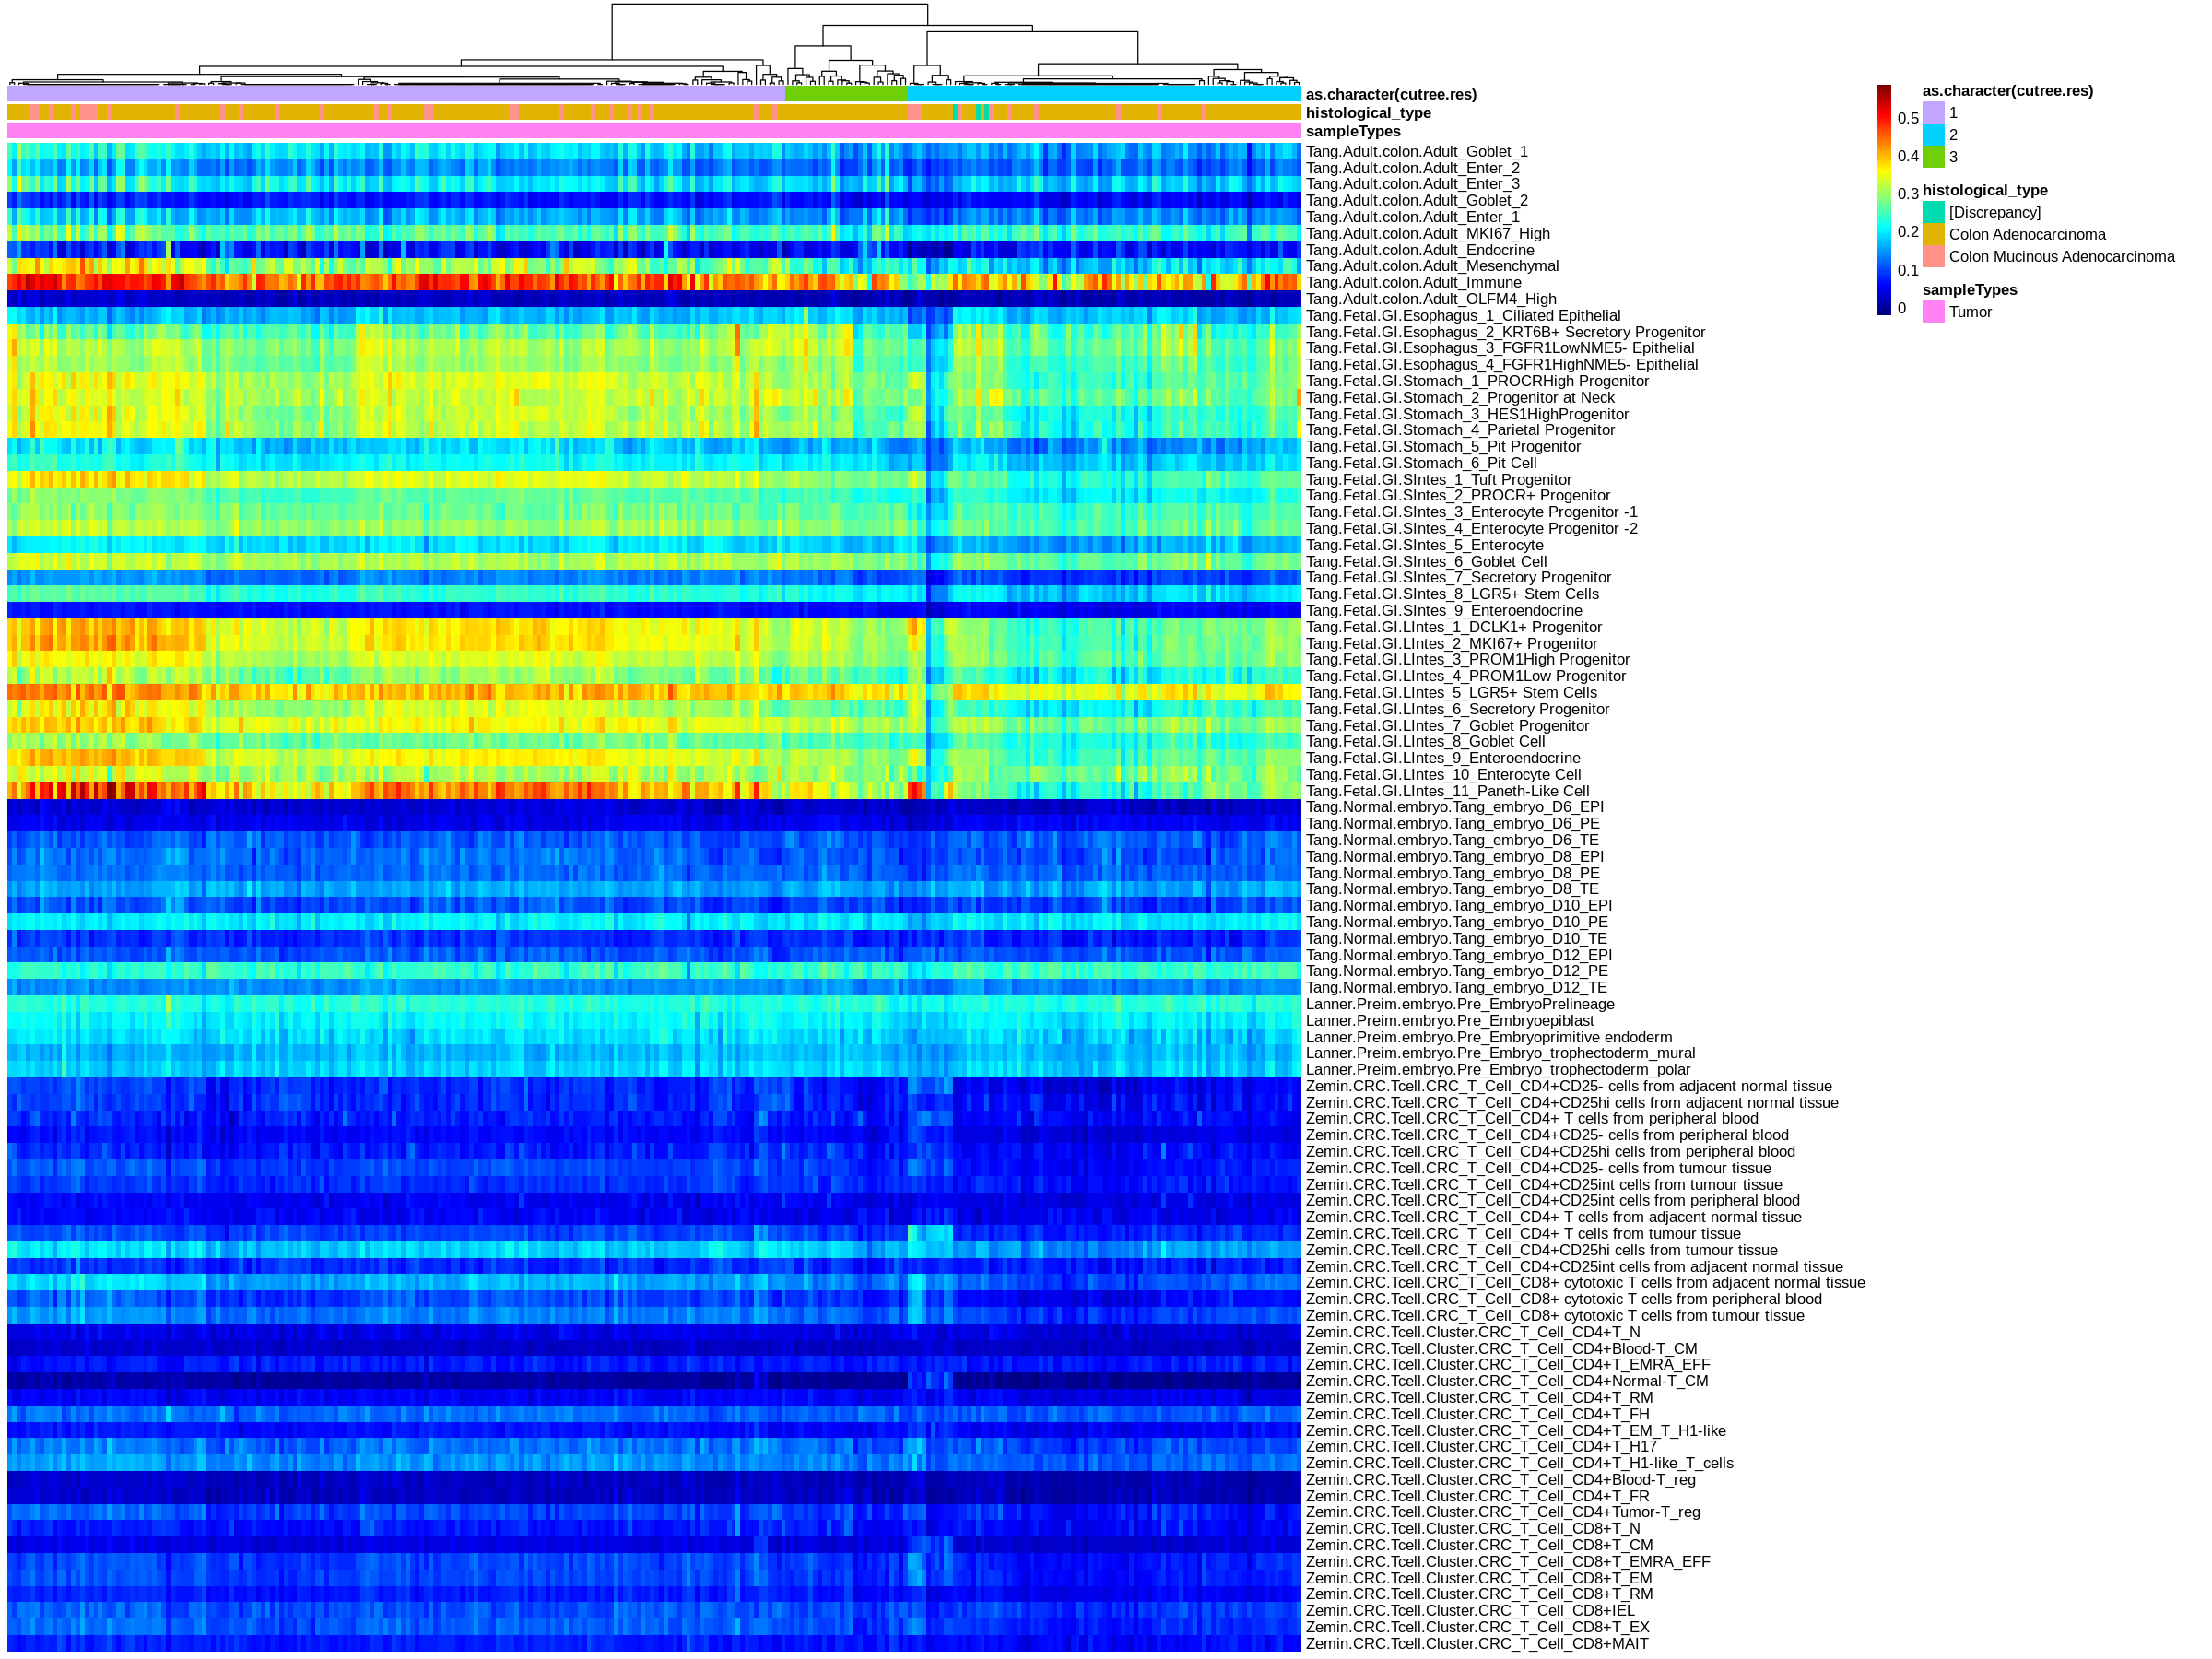

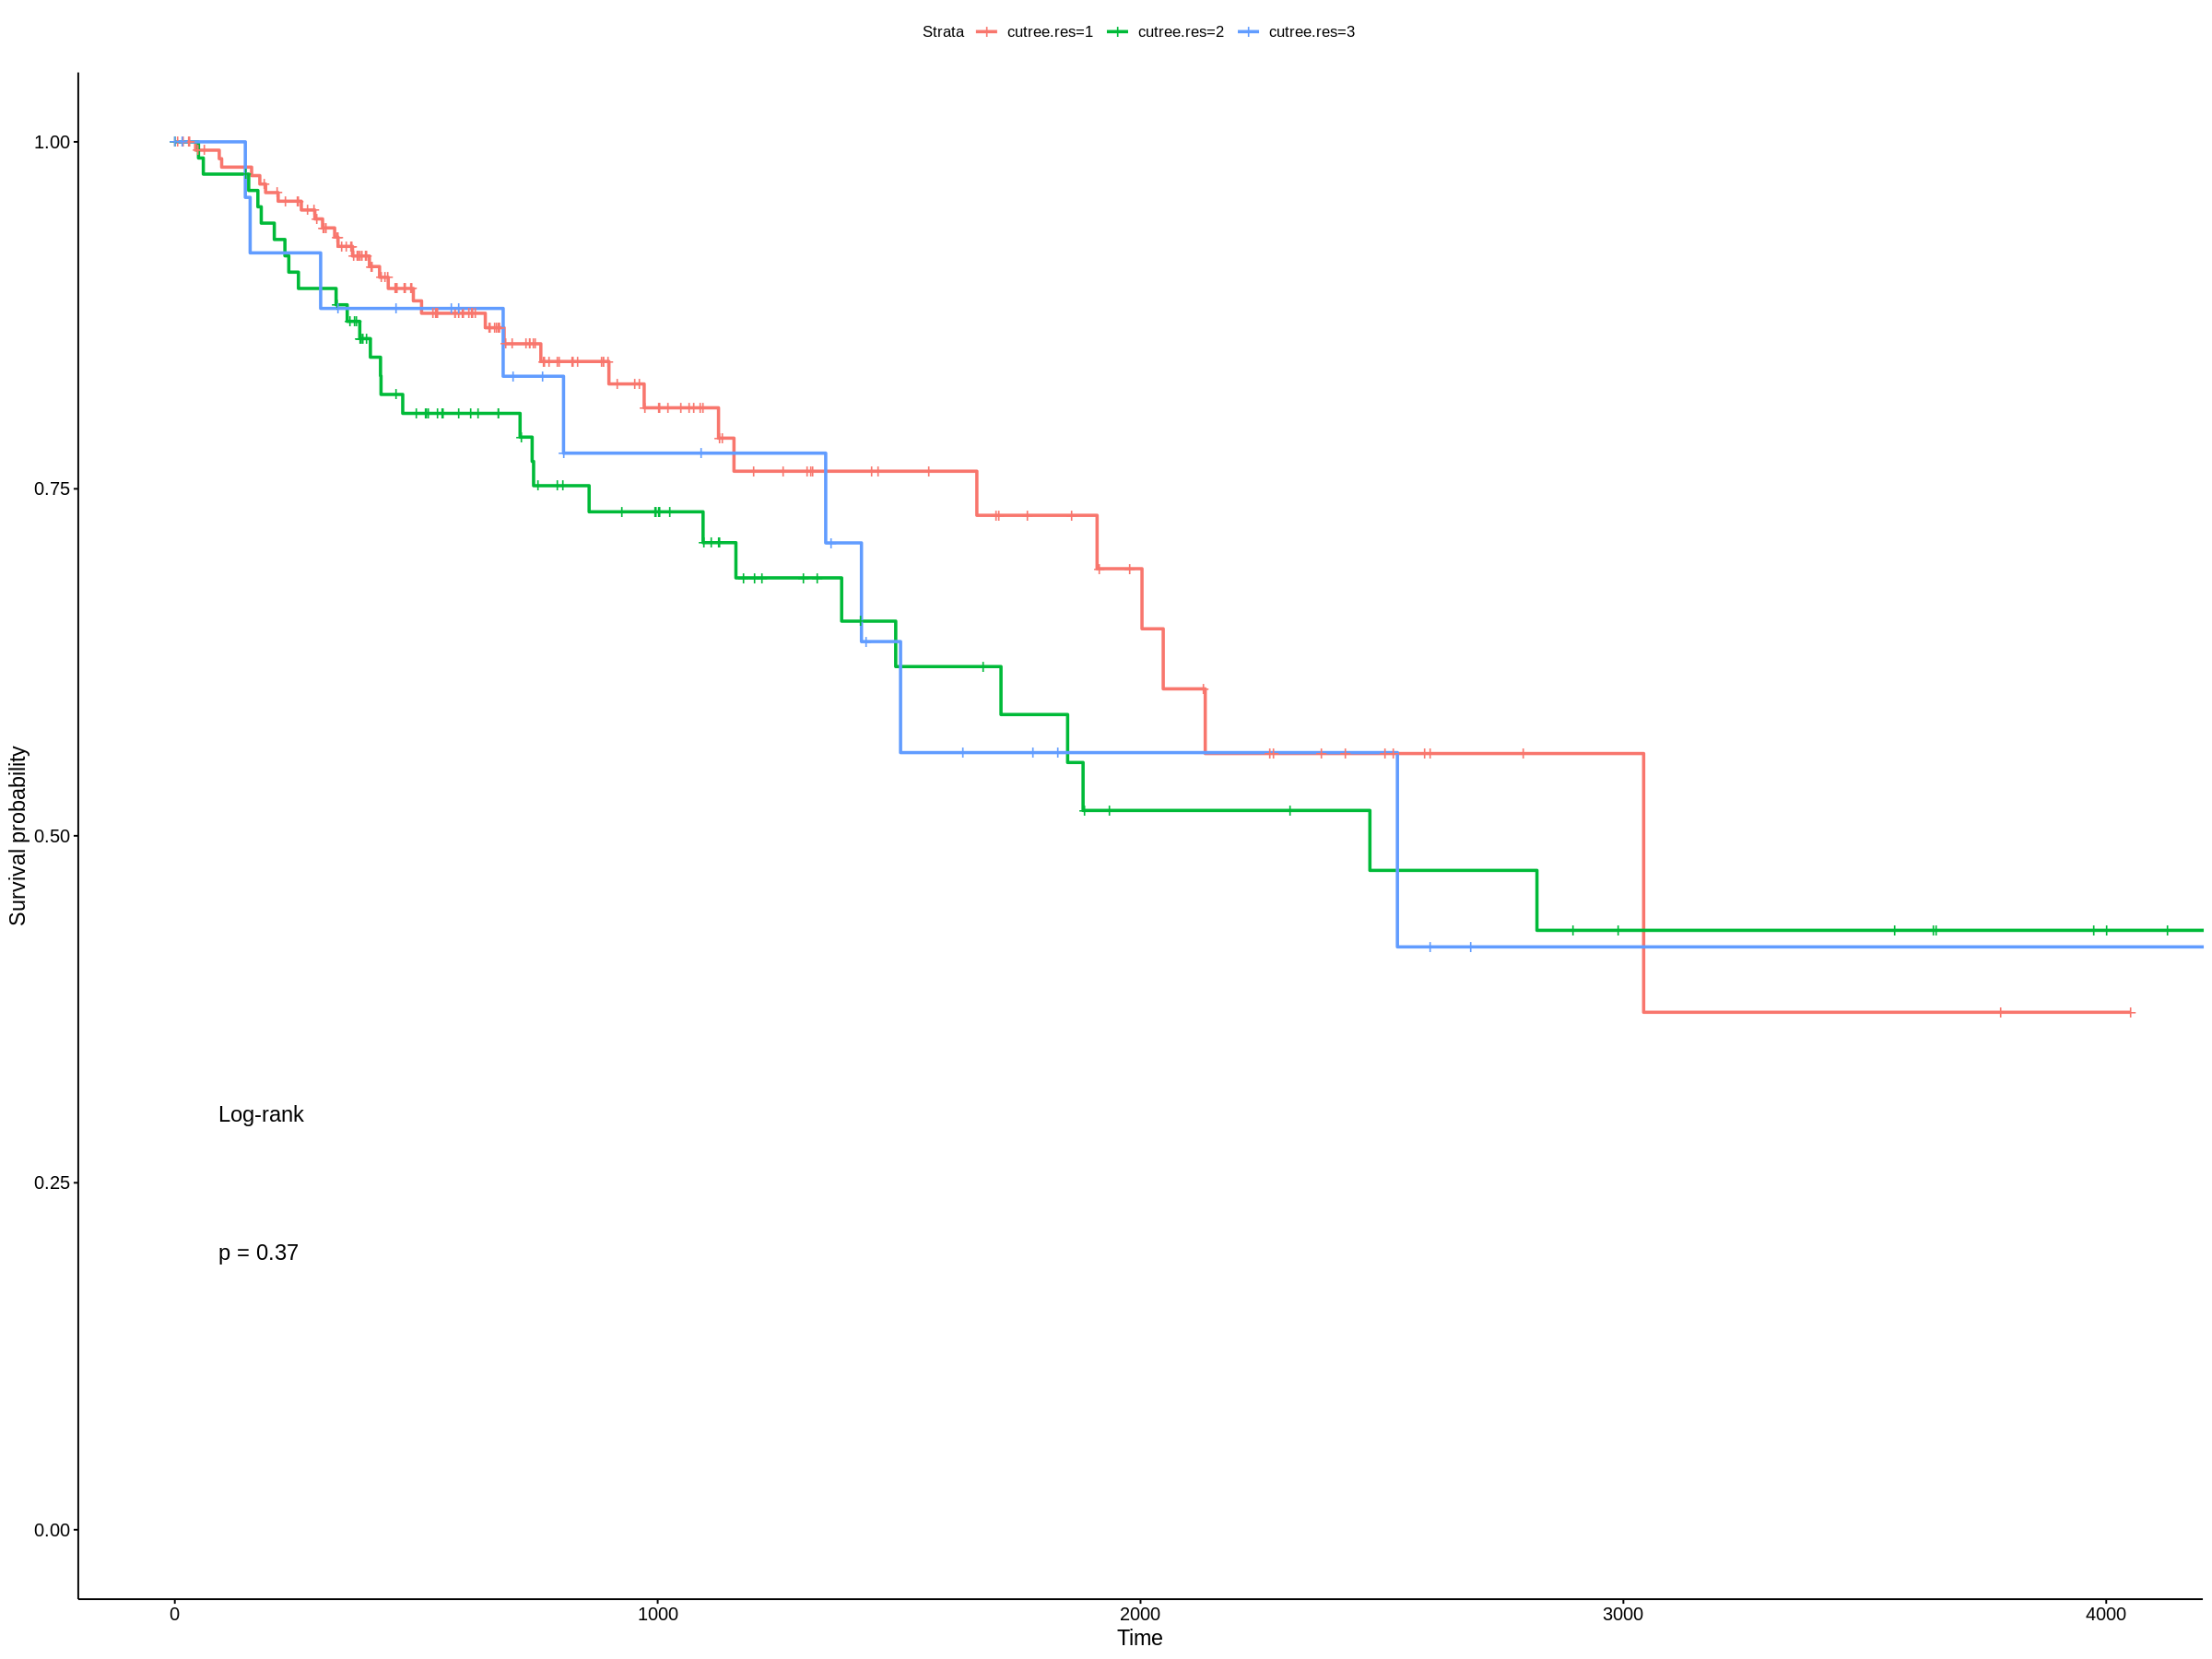

In [8]:
## CV2500
Cor.tumor <- Cor.Res.CV2500$Cor.merged
Cor.tumor<- Cor.tumor[,TumorID]
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor.2500 <- SC3.Tumor$`3`$hc
Col.anno <- COAD.pheno[TumorID,c("sampleTypes","histological_type","OS","OS.time")]
options(repr.plot.width=20, repr.plot.height=15)
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Cor.tumor, hclust.res = hcTumor.2500, Col.anno = Col.anno, k = 3)